In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
#n_units=64
#n_units=128
#n_units=256
n_units=512
#n_units=1024

In [4]:
os.chdir('E:\\MLdataset')

In [5]:
x_csv = pd.read_csv('x_10degree_1rev.csv',header=None)

In [6]:
x_5degree = x_csv.to_numpy(dtype='float32')

In [7]:
x = x_5degree[:, 0:15]

In [8]:
x = x.reshape((37*6, n_sensors, 1))

In [9]:
y_5degree = pd.read_csv('y_output(1rev_10deg).csv',header=None)

In [10]:
os.chdir('C:\\Users\\User')

In [11]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [12]:
y = y_5degree.reshape((37*6, 100, 100))

In [13]:
tsr = x_5degree[:, -2]

In [14]:
theta = x_5degree[:, -1]

In [15]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.1,
                                                                                                 random_state=42)

In [16]:
print(y_train.shape)

(199, 100, 100)


In [17]:
print(y_test.shape)

(23, 100, 100)


In [18]:
print(x_train.shape)

(199, 15, 1)


In [19]:
print(x_test.shape)

(23, 15, 1)


In [20]:
theta_train.shape

(199,)

In [21]:
tsr_train.shape

(199,)

In [22]:
os.chdir('C:\\Users\\User')

In [23]:
input_time = tf.keras.Input(shape=(2, 1))
reshape = tf.keras.layers.Reshape((2,))(input_time)

x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='firstHiddenLayerSensor')(reshape)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='secondHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='thirdHiddenLayerSensor')(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='fourthHiddenLayerSensor')(x_)
output_data = tf.keras.layers.Dense(units=15, activation=None, name='outputLayerSensor')(x_)
output_sensor = tf.keras.layers.Reshape((15, 1))(output_data)
# MLP
sensor_pred = tf.keras.Model(input_time, output_sensor)

In [24]:
sensor_pred.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 1)]            0         
                                                                 
 reshape (Reshape)           (None, 2)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 512)              1536      
 se)                                                             
                                                                 
 secondHiddenLayerSensor (De  (None, 512)              262656    
 nse)                                                            
                                                                 
 thirdHiddenLayerSensor (Den  (None, 512)              262656    
 se)                                                             
                                                             

In [25]:
sensor_pred.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
                     loss = tf.keras.losses.MeanSquaredError(),
                     metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [26]:
theta_train_nor = theta_train / 360
theta_test_nor = theta_test / 360

In [27]:
tsr_theta_train = np.hstack((tsr_train.reshape((-1,1)), theta_train_nor.reshape((-1,1)))).reshape((199, 2, 1))
tsr_theta_test = np.hstack((tsr_test.reshape((-1,1)), theta_test_nor.reshape((-1,1)))).reshape((23, 2, 1))

In [28]:
tsr_theta_train.shape

(199, 2, 1)

In [29]:
start1 = datetime.datetime.now()
history1 = sensor_pred.fit(tsr_theta_train, x_train, epochs=10000, shuffle=True, batch_size=40)
end1 = datetime.datetime.now()

Epoch 1/10000
5/5 [==============================] - 1s 4ms/step - loss: 0.0265 - rmse: 0.1628
Epoch 2/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0207 - rmse: 0.1437
Epoch 3/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0201 - rmse: 0.1417
Epoch 4/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0200 - rmse: 0.1415
Epoch 5/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0198 - rmse: 0.1408
Epoch 6/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0196 - rmse: 0.1400
Epoch 7/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0195 - rmse: 0.1397
Epoch 8/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0195 - rmse: 0.1396
Epoch 9/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0195 - rmse: 0.1395
Epoch 10/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0194 - rmse: 0.1393
Epoch 11/10000
5/5 [=============================

5/5 [==============================] - 0s 3ms/step - loss: 0.0174 - rmse: 0.1321
Epoch 87/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0175 - rmse: 0.1322
Epoch 88/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0175 - rmse: 0.1323
Epoch 89/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0175 - rmse: 0.1323
Epoch 90/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0175 - rmse: 0.1322
Epoch 91/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0173 - rmse: 0.1316
Epoch 92/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0174 - rmse: 0.1320
Epoch 93/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0176 - rmse: 0.1326
Epoch 94/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0174 - rmse: 0.1319
Epoch 95/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0173 - rmse: 0.1315
Epoch 96/10000
5/5 [==============================] - 0

5/5 [==============================] - 0s 4ms/step - loss: 0.0157 - rmse: 0.1255
Epoch 171/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0160 - rmse: 0.1264
Epoch 172/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0158 - rmse: 0.1259
Epoch 173/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0158 - rmse: 0.1257
Epoch 174/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0157 - rmse: 0.1254
Epoch 175/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0158 - rmse: 0.1255
Epoch 176/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0158 - rmse: 0.1256
Epoch 177/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0157 - rmse: 0.1255
Epoch 178/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0158 - rmse: 0.1255
Epoch 179/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0157 - rmse: 0.1254
Epoch 180/10000
5/5 [=========================

5/5 [==============================] - 0s 4ms/step - loss: 0.0144 - rmse: 0.1202
Epoch 255/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0146 - rmse: 0.1209
Epoch 256/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0151 - rmse: 0.1230
Epoch 257/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0151 - rmse: 0.1227
Epoch 258/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0148 - rmse: 0.1216
Epoch 259/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0144 - rmse: 0.1200
Epoch 260/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0143 - rmse: 0.1197
Epoch 261/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0143 - rmse: 0.1196
Epoch 262/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0143 - rmse: 0.1198
Epoch 263/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0144 - rmse: 0.1200
Epoch 264/10000
5/5 [=========================

5/5 [==============================] - 0s 4ms/step - loss: 0.0122 - rmse: 0.1106
Epoch 339/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0122 - rmse: 0.1106
Epoch 340/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0121 - rmse: 0.1101
Epoch 341/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0122 - rmse: 0.1103
Epoch 342/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0121 - rmse: 0.1101
Epoch 343/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0121 - rmse: 0.1100
Epoch 344/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0120 - rmse: 0.1096
Epoch 345/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0121 - rmse: 0.1098
Epoch 346/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0121 - rmse: 0.1100
Epoch 347/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0119 - rmse: 0.1092
Epoch 348/10000
5/5 [=========================

5/5 [==============================] - 0s 4ms/step - loss: 0.0104 - rmse: 0.1020
Epoch 423/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0101 - rmse: 0.1005
Epoch 424/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0100 - rmse: 0.1000
Epoch 425/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0997
Epoch 426/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.0998
Epoch 427/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0100 - rmse: 0.1001
Epoch 428/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0102 - rmse: 0.1012
Epoch 429/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0105 - rmse: 0.1027
Epoch 430/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0106 - rmse: 0.1027
Epoch 431/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0099 - rmse: 0.0993
Epoch 432/10000
5/5 [=========================

5/5 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0868
Epoch 507/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0863
Epoch 508/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0865
Epoch 509/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0075 - rmse: 0.0864
Epoch 510/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0074 - rmse: 0.0858
Epoch 511/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0853
Epoch 512/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0853
Epoch 513/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0855
Epoch 514/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0073 - rmse: 0.0857
Epoch 515/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0072 - rmse: 0.0848
Epoch 516/10000
5/5 [=========================

5/5 [==============================] - 0s 3ms/step - loss: 0.0059 - rmse: 0.0766
Epoch 591/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0769
Epoch 592/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0764
Epoch 593/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0058 - rmse: 0.0765
Epoch 594/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0059 - rmse: 0.0766
Epoch 595/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0757
Epoch 596/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0756
Epoch 597/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0754
Epoch 598/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0056 - rmse: 0.0751
Epoch 599/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0057 - rmse: 0.0753
Epoch 600/10000
5/5 [=========================

5/5 [==============================] - 0s 4ms/step - loss: 0.0046 - rmse: 0.0679
Epoch 675/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0045 - rmse: 0.0671
Epoch 676/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0045 - rmse: 0.0671
Epoch 677/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0045 - rmse: 0.0672
Epoch 678/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0044 - rmse: 0.0665
Epoch 679/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0045 - rmse: 0.0673
Epoch 680/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0658
Epoch 681/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0043 - rmse: 0.0657
Epoch 682/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0044 - rmse: 0.0660
Epoch 683/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0043 - rmse: 0.0655
Epoch 684/10000
5/5 [=========================

5/5 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0576
Epoch 759/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0572
Epoch 760/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0572
Epoch 761/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0032 - rmse: 0.0570
Epoch 762/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0573
Epoch 763/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0034 - rmse: 0.0584
Epoch 764/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0033 - rmse: 0.0577
Epoch 765/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0568
Epoch 766/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0032 - rmse: 0.0566
Epoch 767/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0032 - rmse: 0.0566
Epoch 768/10000
5/5 [=========================

5/5 [==============================] - 0s 4ms/step - loss: 0.0024 - rmse: 0.0486
Epoch 843/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0480
Epoch 844/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 845/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0479
Epoch 846/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0023 - rmse: 0.0483
Epoch 847/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 848/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 849/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0475
Epoch 850/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0023 - rmse: 0.0484
Epoch 851/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0023 - rmse: 0.0481
Epoch 852/10000
5/5 [=========================

5/5 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0406
Epoch 927/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0403
Epoch 928/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 929/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0016 - rmse: 0.0398
Epoch 930/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0405
Epoch 931/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0398
Epoch 932/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0016 - rmse: 0.0401
Epoch 933/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0015 - rmse: 0.0392
Epoch 934/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0393
Epoch 935/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0393
Epoch 936/10000
5/5 [=========================

5/5 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 1011/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 1012/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 1013/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0329
Epoch 1014/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0326
Epoch 1015/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 1016/10000
5/5 [==============================] - 0s 3ms/step - loss: 0.0011 - rmse: 0.0327
Epoch 1017/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0326
Epoch 1018/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 1019/10000
5/5 [==============================] - 0s 4ms/step - loss: 0.0011 - rmse: 0.0325
Epoch 1020/10000
5/5 [===============

5/5 [==============================] - 0s 4ms/step - loss: 7.5332e-04 - rmse: 0.0274
Epoch 1092/10000
5/5 [==============================] - 0s 4ms/step - loss: 7.2930e-04 - rmse: 0.0270
Epoch 1093/10000
5/5 [==============================] - 0s 4ms/step - loss: 7.2999e-04 - rmse: 0.0270
Epoch 1094/10000
5/5 [==============================] - 0s 4ms/step - loss: 7.4838e-04 - rmse: 0.0274
Epoch 1095/10000
5/5 [==============================] - 0s 4ms/step - loss: 7.1342e-04 - rmse: 0.0267
Epoch 1096/10000
5/5 [==============================] - 0s 4ms/step - loss: 7.2377e-04 - rmse: 0.0269
Epoch 1097/10000
5/5 [==============================] - 0s 4ms/step - loss: 7.1929e-04 - rmse: 0.0268
Epoch 1098/10000
5/5 [==============================] - 0s 3ms/step - loss: 7.1553e-04 - rmse: 0.0267
Epoch 1099/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.8974e-04 - rmse: 0.0263
Epoch 1100/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.9250e-04 - rmse: 0.02

5/5 [==============================] - 0s 4ms/step - loss: 5.2798e-04 - rmse: 0.0230
Epoch 1172/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.1417e-04 - rmse: 0.0227
Epoch 1173/10000
5/5 [==============================] - 0s 3ms/step - loss: 5.3231e-04 - rmse: 0.0231
Epoch 1174/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.0883e-04 - rmse: 0.0226
Epoch 1175/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.9774e-04 - rmse: 0.0223
Epoch 1176/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.7919e-04 - rmse: 0.0219
Epoch 1177/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.7281e-04 - rmse: 0.0217
Epoch 1178/10000
5/5 [==============================] - 0s 3ms/step - loss: 4.8247e-04 - rmse: 0.0220
Epoch 1179/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.0011e-04 - rmse: 0.0224
Epoch 1180/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.8266e-04 - rmse: 0.02

5/5 [==============================] - 0s 4ms/step - loss: 3.6821e-04 - rmse: 0.0192
Epoch 1252/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.7035e-04 - rmse: 0.0192
Epoch 1253/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.6534e-04 - rmse: 0.0191
Epoch 1254/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.6830e-04 - rmse: 0.0192
Epoch 1255/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.5811e-04 - rmse: 0.0189
Epoch 1256/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.5992e-04 - rmse: 0.0190
Epoch 1257/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.2634e-04 - rmse: 0.0181
Epoch 1258/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.4370e-04 - rmse: 0.0185
Epoch 1259/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.3003e-04 - rmse: 0.0182
Epoch 1260/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.3859e-04 - rmse: 0.01

5/5 [==============================] - 0s 4ms/step - loss: 2.3472e-04 - rmse: 0.0153
Epoch 1332/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.4568e-04 - rmse: 0.0157
Epoch 1333/10000
5/5 [==============================] - 0s 3ms/step - loss: 2.3519e-04 - rmse: 0.0153
Epoch 1334/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.5306e-04 - rmse: 0.0159
Epoch 1335/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.4650e-04 - rmse: 0.0157
Epoch 1336/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.4591e-04 - rmse: 0.0157
Epoch 1337/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.5371e-04 - rmse: 0.0159
Epoch 1338/10000
5/5 [==============================] - 0s 3ms/step - loss: 2.5215e-04 - rmse: 0.0159
Epoch 1339/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.6208e-04 - rmse: 0.0162
Epoch 1340/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.4814e-04 - rmse: 0.01

5/5 [==============================] - 0s 3ms/step - loss: 2.0204e-04 - rmse: 0.0142
Epoch 1412/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.9577e-04 - rmse: 0.0140
Epoch 1413/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.8369e-04 - rmse: 0.0136
Epoch 1414/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.9809e-04 - rmse: 0.0141
Epoch 1415/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.1304e-04 - rmse: 0.0146
Epoch 1416/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.9591e-04 - rmse: 0.0140
Epoch 1417/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.9980e-04 - rmse: 0.0141
Epoch 1418/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.9417e-04 - rmse: 0.0139
Epoch 1419/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.9034e-04 - rmse: 0.0138
Epoch 1420/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.8281e-04 - rmse: 0.01

5/5 [==============================] - 0s 4ms/step - loss: 1.6010e-04 - rmse: 0.0127
Epoch 1492/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.6148e-04 - rmse: 0.0127
Epoch 1493/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.6842e-04 - rmse: 0.0130
Epoch 1494/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.5447e-04 - rmse: 0.0124
Epoch 1495/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.5565e-04 - rmse: 0.0125
Epoch 1496/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.6868e-04 - rmse: 0.0130
Epoch 1497/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.6297e-04 - rmse: 0.0128
Epoch 1498/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.5124e-04 - rmse: 0.0123
Epoch 1499/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.5472e-04 - rmse: 0.0124
Epoch 1500/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.6092e-04 - rmse: 0.01

5/5 [==============================] - 0s 4ms/step - loss: 1.5647e-04 - rmse: 0.0125
Epoch 1572/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.4091e-04 - rmse: 0.0119
Epoch 1573/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.4160e-04 - rmse: 0.0119
Epoch 1574/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.4116e-04 - rmse: 0.0119
Epoch 1575/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.3580e-04 - rmse: 0.0117
Epoch 1576/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.2467e-04 - rmse: 0.0112
Epoch 1577/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.3307e-04 - rmse: 0.0115
Epoch 1578/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.4654e-04 - rmse: 0.0121
Epoch 1579/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.4993e-04 - rmse: 0.0122
Epoch 1580/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.4007e-04 - rmse: 0.01

5/5 [==============================] - 0s 4ms/step - loss: 1.4568e-04 - rmse: 0.0121
Epoch 1652/10000
5/5 [==============================] - 0s 3ms/step - loss: 1.6253e-04 - rmse: 0.0127
Epoch 1653/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.6055e-04 - rmse: 0.0127
Epoch 1654/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.2748e-04 - rmse: 0.0113
Epoch 1655/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.2670e-04 - rmse: 0.0113
Epoch 1656/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.2673e-04 - rmse: 0.0113
Epoch 1657/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.1741e-04 - rmse: 0.0108
Epoch 1658/10000
5/5 [==============================] - 0s 3ms/step - loss: 1.1371e-04 - rmse: 0.0107
Epoch 1659/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.0897e-04 - rmse: 0.0104
Epoch 1660/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.1058e-04 - rmse: 0.01

5/5 [==============================] - 0s 4ms/step - loss: 9.9723e-05 - rmse: 0.0100
Epoch 1732/10000
5/5 [==============================] - 0s 4ms/step - loss: 9.7550e-05 - rmse: 0.0099
Epoch 1733/10000
5/5 [==============================] - 0s 4ms/step - loss: 9.6674e-05 - rmse: 0.0098
Epoch 1734/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.0384e-04 - rmse: 0.0102
Epoch 1735/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.1416e-04 - rmse: 0.0107
Epoch 1736/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.1007e-04 - rmse: 0.0105
Epoch 1737/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.0028e-04 - rmse: 0.0100
Epoch 1738/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.0267e-04 - rmse: 0.0101
Epoch 1739/10000
5/5 [==============================] - 0s 4ms/step - loss: 9.8928e-05 - rmse: 0.0099
Epoch 1740/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.0545e-04 - rmse: 0.01

5/5 [==============================] - 0s 4ms/step - loss: 1.5395e-04 - rmse: 0.0124
Epoch 1812/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.8137e-04 - rmse: 0.0135
Epoch 1813/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.3318e-04 - rmse: 0.0115
Epoch 1814/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.2210e-04 - rmse: 0.0111
Epoch 1815/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.3280e-04 - rmse: 0.0115
Epoch 1816/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.3335e-04 - rmse: 0.0115
Epoch 1817/10000
5/5 [==============================] - 0s 3ms/step - loss: 1.3711e-04 - rmse: 0.0117
Epoch 1818/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.1653e-04 - rmse: 0.0108
Epoch 1819/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.1667e-04 - rmse: 0.0108
Epoch 1820/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.0060e-04 - rmse: 0.01

5/5 [==============================] - 0s 4ms/step - loss: 9.5386e-05 - rmse: 0.0098
Epoch 1892/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.3146e-04 - rmse: 0.0115
Epoch 1893/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.4991e-04 - rmse: 0.0122
Epoch 1894/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.2199e-04 - rmse: 0.0110
Epoch 1895/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.3457e-04 - rmse: 0.0116
Epoch 1896/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.7209e-04 - rmse: 0.0131
Epoch 1897/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.3415e-04 - rmse: 0.0116
Epoch 1898/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.3793e-04 - rmse: 0.0117
Epoch 1899/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.2130e-04 - rmse: 0.0110
Epoch 1900/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.4049e-04 - rmse: 0.01

5/5 [==============================] - 0s 3ms/step - loss: 7.8202e-05 - rmse: 0.0088
Epoch 1972/10000
5/5 [==============================] - 0s 4ms/step - loss: 9.5025e-05 - rmse: 0.0097
Epoch 1973/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.0818e-04 - rmse: 0.0104
Epoch 1974/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.0602e-04 - rmse: 0.0103
Epoch 1975/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.1910e-04 - rmse: 0.0109
Epoch 1976/10000
5/5 [==============================] - 0s 3ms/step - loss: 1.1104e-04 - rmse: 0.0105
Epoch 1977/10000
5/5 [==============================] - 0s 3ms/step - loss: 9.3591e-05 - rmse: 0.0097
Epoch 1978/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.0234e-04 - rmse: 0.0101
Epoch 1979/10000
5/5 [==============================] - 0s 4ms/step - loss: 9.3052e-05 - rmse: 0.0096
Epoch 1980/10000
5/5 [==============================] - 0s 4ms/step - loss: 9.1754e-05 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 6.8971e-05 - rmse: 0.0083
Epoch 2052/10000
5/5 [==============================] - 0s 4ms/step - loss: 7.2063e-05 - rmse: 0.0085
Epoch 2053/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.7562e-05 - rmse: 0.0082
Epoch 2054/10000
5/5 [==============================] - 0s 5ms/step - loss: 7.0757e-05 - rmse: 0.0084
Epoch 2055/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.8310e-05 - rmse: 0.0094
Epoch 2056/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.3633e-05 - rmse: 0.0097
Epoch 2057/10000
5/5 [==============================] - 0s 5ms/step - loss: 9.0029e-05 - rmse: 0.0095
Epoch 2058/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.2080e-05 - rmse: 0.0096
Epoch 2059/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.9686e-05 - rmse: 0.0100
Epoch 2060/10000
5/5 [==============================] - 0s 5ms/step - loss: 7.8706e-05 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 8.3259e-05 - rmse: 0.0091
Epoch 2132/10000
5/5 [==============================] - 0s 4ms/step - loss: 8.2572e-05 - rmse: 0.0091
Epoch 2133/10000
5/5 [==============================] - 0s 4ms/step - loss: 7.5548e-05 - rmse: 0.0087
Epoch 2134/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.9913e-05 - rmse: 0.0084
Epoch 2135/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.5098e-05 - rmse: 0.0081
Epoch 2136/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.8994e-05 - rmse: 0.0077
Epoch 2137/10000
5/5 [==============================] - 0s 3ms/step - loss: 6.5965e-05 - rmse: 0.0081
Epoch 2138/10000
5/5 [==============================] - 0s 4ms/step - loss: 7.4054e-05 - rmse: 0.0086
Epoch 2139/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.5842e-05 - rmse: 0.0081
Epoch 2140/10000
5/5 [==============================] - 0s 4ms/step - loss: 7.9857e-05 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 7.5497e-05 - rmse: 0.0087
Epoch 2212/10000
5/5 [==============================] - 0s 3ms/step - loss: 6.7170e-05 - rmse: 0.0082
Epoch 2213/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.0487e-05 - rmse: 0.0078
Epoch 2214/10000
5/5 [==============================] - 0s 4ms/step - loss: 7.7718e-05 - rmse: 0.0088
Epoch 2215/10000
5/5 [==============================] - 0s 4ms/step - loss: 7.6658e-05 - rmse: 0.0088
Epoch 2216/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.1703e-04 - rmse: 0.0108
Epoch 2217/10000
5/5 [==============================] - 0s 3ms/step - loss: 8.6437e-05 - rmse: 0.0093
Epoch 2218/10000
5/5 [==============================] - 0s 4ms/step - loss: 9.5683e-05 - rmse: 0.0098
Epoch 2219/10000
5/5 [==============================] - 0s 4ms/step - loss: 9.2432e-05 - rmse: 0.0096
Epoch 2220/10000
5/5 [==============================] - 0s 4ms/step - loss: 8.4943e-05 - rmse: 0.00

5/5 [==============================] - 0s 7ms/step - loss: 5.2888e-05 - rmse: 0.0073
Epoch 2292/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.7990e-05 - rmse: 0.0069
Epoch 2293/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.2322e-05 - rmse: 0.0072
Epoch 2294/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.0042e-05 - rmse: 0.0071
Epoch 2295/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.6671e-05 - rmse: 0.0068
Epoch 2296/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.6653e-05 - rmse: 0.0068
Epoch 2297/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.7778e-05 - rmse: 0.0069
Epoch 2298/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.1076e-05 - rmse: 0.0071
Epoch 2299/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.0966e-05 - rmse: 0.0078
Epoch 2300/10000
5/5 [==============================] - 0s 3ms/step - loss: 4.7820e-05 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 4.5339e-05 - rmse: 0.0067
Epoch 2372/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.4571e-05 - rmse: 0.0067
Epoch 2373/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.8040e-05 - rmse: 0.0069
Epoch 2374/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.8748e-05 - rmse: 0.0070
Epoch 2375/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.8419e-05 - rmse: 0.0076
Epoch 2376/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.0037e-05 - rmse: 0.0071
Epoch 2377/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.3986e-05 - rmse: 0.0066
Epoch 2378/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.1039e-05 - rmse: 0.0071
Epoch 2379/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.8893e-05 - rmse: 0.0062
Epoch 2380/10000
5/5 [==============================] - 0s 3ms/step - loss: 3.8395e-05 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 6.2231e-05 - rmse: 0.0079
Epoch 2452/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.3850e-05 - rmse: 0.0073
Epoch 2453/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.8289e-05 - rmse: 0.0076
Epoch 2454/10000
5/5 [==============================] - 0s 4ms/step - loss: 8.1286e-05 - rmse: 0.0090
Epoch 2455/10000
5/5 [==============================] - 0s 3ms/step - loss: 9.2722e-05 - rmse: 0.0096
Epoch 2456/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.0143e-04 - rmse: 0.0101
Epoch 2457/10000
5/5 [==============================] - 0s 4ms/step - loss: 7.9532e-05 - rmse: 0.0089
Epoch 2458/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.6646e-05 - rmse: 0.0075
Epoch 2459/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.8111e-05 - rmse: 0.0069
Epoch 2460/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.7332e-05 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 2.9723e-05 - rmse: 0.0055
Epoch 2532/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.3253e-05 - rmse: 0.0058
Epoch 2533/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.1532e-05 - rmse: 0.0056
Epoch 2534/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.2405e-05 - rmse: 0.0057
Epoch 2535/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.7881e-05 - rmse: 0.0062
Epoch 2536/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.2655e-05 - rmse: 0.0057
Epoch 2537/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.0166e-05 - rmse: 0.0063
Epoch 2538/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.3788e-05 - rmse: 0.0073
Epoch 2539/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.7053e-05 - rmse: 0.0082
Epoch 2540/10000
5/5 [==============================] - 0s 4ms/step - loss: 7.6756e-05 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 3.8552e-05 - rmse: 0.0062
Epoch 2612/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.9743e-05 - rmse: 0.0063
Epoch 2613/10000
5/5 [==============================] - 0s 3ms/step - loss: 3.7441e-05 - rmse: 0.0061
Epoch 2614/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.2381e-05 - rmse: 0.0057
Epoch 2615/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.2864e-05 - rmse: 0.0057
Epoch 2616/10000
5/5 [==============================] - 0s 3ms/step - loss: 2.6778e-05 - rmse: 0.0052
Epoch 2617/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.4934e-05 - rmse: 0.0050
Epoch 2618/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.8697e-05 - rmse: 0.0054
Epoch 2619/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.7295e-05 - rmse: 0.0052
Epoch 2620/10000
5/5 [==============================] - 0s 3ms/step - loss: 3.3255e-05 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 2.7279e-05 - rmse: 0.0052
Epoch 2692/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.3535e-05 - rmse: 0.0058
Epoch 2693/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.4177e-05 - rmse: 0.0058
Epoch 2694/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.4994e-05 - rmse: 0.0059
Epoch 2695/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.0503e-05 - rmse: 0.0055
Epoch 2696/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.7102e-05 - rmse: 0.0061
Epoch 2697/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.7626e-05 - rmse: 0.0061
Epoch 2698/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6499e-05 - rmse: 0.0060
Epoch 2699/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.0054e-05 - rmse: 0.0055
Epoch 2700/10000
5/5 [==============================] - 0s 5ms/step - loss: 2.9921e-05 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 2.5640e-05 - rmse: 0.0051
Epoch 2772/10000
5/5 [==============================] - 0s 3ms/step - loss: 2.3411e-05 - rmse: 0.0048
Epoch 2773/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.7145e-05 - rmse: 0.0052
Epoch 2774/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.1690e-05 - rmse: 0.0047
Epoch 2775/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.0571e-05 - rmse: 0.0045
Epoch 2776/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.9346e-05 - rmse: 0.0044
Epoch 2777/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.0265e-05 - rmse: 0.0045
Epoch 2778/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.3672e-05 - rmse: 0.0049
Epoch 2779/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.0098e-05 - rmse: 0.0045
Epoch 2780/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.0861e-05 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 1.3346e-05 - rmse: 0.0037
Epoch 2852/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.5798e-05 - rmse: 0.0040
Epoch 2853/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.6036e-05 - rmse: 0.0040
Epoch 2854/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.8240e-05 - rmse: 0.0043
Epoch 2855/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.5837e-05 - rmse: 0.0040
Epoch 2856/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.4928e-05 - rmse: 0.0039
Epoch 2857/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.4545e-05 - rmse: 0.0038
Epoch 2858/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.3477e-05 - rmse: 0.0037
Epoch 2859/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.2901e-05 - rmse: 0.0036
Epoch 2860/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.4339e-05 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 4.0284e-05 - rmse: 0.0063
Epoch 2932/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.1775e-05 - rmse: 0.0065
Epoch 2933/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.5488e-05 - rmse: 0.0060
Epoch 2934/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.5584e-05 - rmse: 0.0060
Epoch 2935/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.3169e-05 - rmse: 0.0058
Epoch 2936/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.8031e-05 - rmse: 0.0053
Epoch 2937/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.3107e-05 - rmse: 0.0048
Epoch 2938/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.9942e-05 - rmse: 0.0045
Epoch 2939/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.8109e-05 - rmse: 0.0043
Epoch 2940/10000
5/5 [==============================] - 0s 3ms/step - loss: 1.7403e-05 - rmse: 0.00

5/5 [==============================] - 0s 3ms/step - loss: 2.0834e-05 - rmse: 0.0046
Epoch 3012/10000
5/5 [==============================] - 0s 3ms/step - loss: 2.1845e-05 - rmse: 0.0047
Epoch 3013/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.4910e-05 - rmse: 0.0050
Epoch 3014/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.6548e-05 - rmse: 0.0052
Epoch 3015/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.0295e-05 - rmse: 0.0045
Epoch 3016/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.6911e-05 - rmse: 0.0041
Epoch 3017/10000
5/5 [==============================] - 0s 3ms/step - loss: 1.5158e-05 - rmse: 0.0039
Epoch 3018/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.6974e-05 - rmse: 0.0041
Epoch 3019/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.7851e-05 - rmse: 0.0042
Epoch 3020/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.9259e-05 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 1.8535e-05 - rmse: 0.0043
Epoch 3092/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.6707e-05 - rmse: 0.0041
Epoch 3093/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.4273e-05 - rmse: 0.0038
Epoch 3094/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.2144e-05 - rmse: 0.0035
Epoch 3095/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.1022e-05 - rmse: 0.0033
Epoch 3096/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.1184e-05 - rmse: 0.0033
Epoch 3097/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.1574e-05 - rmse: 0.0034
Epoch 3098/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.2289e-05 - rmse: 0.0035
Epoch 3099/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.1164e-05 - rmse: 0.0033
Epoch 3100/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.0503e-05 - rmse: 0.00

5/5 [==============================] - 0s 3ms/step - loss: 4.6005e-05 - rmse: 0.0068
Epoch 3172/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.9987e-05 - rmse: 0.0063
Epoch 3173/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.0317e-05 - rmse: 0.0055
Epoch 3174/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.2277e-05 - rmse: 0.0047
Epoch 3175/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.4650e-05 - rmse: 0.0050
Epoch 3176/10000
5/5 [==============================] - 0s 3ms/step - loss: 2.1210e-05 - rmse: 0.0046
Epoch 3177/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.0879e-05 - rmse: 0.0046
Epoch 3178/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.3356e-05 - rmse: 0.0048
Epoch 3179/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.7541e-05 - rmse: 0.0052
Epoch 3180/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.4601e-05 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 8.7747e-06 - rmse: 0.0030
Epoch 3252/10000
5/5 [==============================] - 0s 3ms/step - loss: 8.7159e-06 - rmse: 0.0030
Epoch 3253/10000
5/5 [==============================] - 0s 4ms/step - loss: 8.3453e-06 - rmse: 0.0029
Epoch 3254/10000
5/5 [==============================] - 0s 4ms/step - loss: 8.6276e-06 - rmse: 0.0029
Epoch 3255/10000
5/5 [==============================] - 0s 4ms/step - loss: 8.4059e-06 - rmse: 0.0029
Epoch 3256/10000
5/5 [==============================] - 0s 4ms/step - loss: 8.4786e-06 - rmse: 0.0029
Epoch 3257/10000
5/5 [==============================] - 0s 3ms/step - loss: 8.4919e-06 - rmse: 0.0029
Epoch 3258/10000
5/5 [==============================] - 0s 4ms/step - loss: 8.6417e-06 - rmse: 0.0029
Epoch 3259/10000
5/5 [==============================] - 0s 4ms/step - loss: 8.5876e-06 - rmse: 0.0029
Epoch 3260/10000
5/5 [==============================] - 0s 4ms/step - loss: 8.8385e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 6.2851e-06 - rmse: 0.0025
Epoch 3332/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.4440e-06 - rmse: 0.0025
Epoch 3333/10000
5/5 [==============================] - 0s 3ms/step - loss: 6.5690e-06 - rmse: 0.0026
Epoch 3334/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.9349e-06 - rmse: 0.0026
Epoch 3335/10000
5/5 [==============================] - 0s 3ms/step - loss: 6.8693e-06 - rmse: 0.0026
Epoch 3336/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.6643e-06 - rmse: 0.0026
Epoch 3337/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.3287e-06 - rmse: 0.0025
Epoch 3338/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.7976e-06 - rmse: 0.0026
Epoch 3339/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.4218e-06 - rmse: 0.0025
Epoch 3340/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.7428e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 6.3784e-06 - rmse: 0.0025
Epoch 3412/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.0325e-06 - rmse: 0.0025
Epoch 3413/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.1059e-06 - rmse: 0.0025
Epoch 3414/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.0361e-06 - rmse: 0.0025
Epoch 3415/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.3049e-06 - rmse: 0.0025
Epoch 3416/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.6260e-06 - rmse: 0.0026
Epoch 3417/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.5244e-06 - rmse: 0.0026
Epoch 3418/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.1896e-06 - rmse: 0.0025
Epoch 3419/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.1481e-06 - rmse: 0.0025
Epoch 3420/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.4408e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 9.2952e-06 - rmse: 0.0030
Epoch 3492/10000
5/5 [==============================] - 0s 4ms/step - loss: 8.5625e-06 - rmse: 0.0029
Epoch 3493/10000
5/5 [==============================] - 0s 3ms/step - loss: 8.4171e-06 - rmse: 0.0029
Epoch 3494/10000
5/5 [==============================] - 0s 4ms/step - loss: 9.9114e-06 - rmse: 0.0031
Epoch 3495/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.1739e-05 - rmse: 0.0034
Epoch 3496/10000
5/5 [==============================] - 0s 4ms/step - loss: 9.3825e-06 - rmse: 0.0031
Epoch 3497/10000
5/5 [==============================] - 0s 4ms/step - loss: 9.0737e-06 - rmse: 0.0030
Epoch 3498/10000
5/5 [==============================] - 0s 3ms/step - loss: 7.4015e-06 - rmse: 0.0027
Epoch 3499/10000
5/5 [==============================] - 0s 4ms/step - loss: 7.1646e-06 - rmse: 0.0027
Epoch 3500/10000
5/5 [==============================] - 0s 4ms/step - loss: 7.0386e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 1.2677e-05 - rmse: 0.0036
Epoch 3572/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.1023e-05 - rmse: 0.0033
Epoch 3573/10000
5/5 [==============================] - 0s 4ms/step - loss: 9.2426e-06 - rmse: 0.0030
Epoch 3574/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.0080e-05 - rmse: 0.0032
Epoch 3575/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.1154e-05 - rmse: 0.0033
Epoch 3576/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.1359e-05 - rmse: 0.0034
Epoch 3577/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.6124e-05 - rmse: 0.0040
Epoch 3578/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.0213e-05 - rmse: 0.0045
Epoch 3579/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.9358e-05 - rmse: 0.0044
Epoch 3580/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.7127e-05 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 1.2573e-05 - rmse: 0.0035
Epoch 3652/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.2489e-05 - rmse: 0.0035
Epoch 3653/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.0580e-05 - rmse: 0.0033
Epoch 3654/10000
5/5 [==============================] - 0s 3ms/step - loss: 9.4411e-06 - rmse: 0.0031
Epoch 3655/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.1478e-05 - rmse: 0.0034
Epoch 3656/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.2318e-05 - rmse: 0.0035
Epoch 3657/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.5214e-05 - rmse: 0.0039
Epoch 3658/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.0521e-05 - rmse: 0.0045
Epoch 3659/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.1109e-05 - rmse: 0.0046
Epoch 3660/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.7316e-05 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 2.3489e-05 - rmse: 0.0048
Epoch 3732/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.7967e-05 - rmse: 0.0053
Epoch 3733/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.9847e-05 - rmse: 0.0055
Epoch 3734/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.8298e-05 - rmse: 0.0053
Epoch 3735/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.0754e-05 - rmse: 0.0055
Epoch 3736/10000
5/5 [==============================] - 0s 3ms/step - loss: 3.6661e-05 - rmse: 0.0061
Epoch 3737/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.9437e-05 - rmse: 0.0063
Epoch 3738/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.6731e-05 - rmse: 0.0068
Epoch 3739/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.8381e-05 - rmse: 0.0076
Epoch 3740/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.0022e-05 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 2.0418e-05 - rmse: 0.0045
Epoch 3812/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.4837e-05 - rmse: 0.0050
Epoch 3813/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.1298e-05 - rmse: 0.0046
Epoch 3814/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.7479e-05 - rmse: 0.0042
Epoch 3815/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.5133e-05 - rmse: 0.0039
Epoch 3816/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.5023e-05 - rmse: 0.0039
Epoch 3817/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.2953e-05 - rmse: 0.0036
Epoch 3818/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.0751e-05 - rmse: 0.0033
Epoch 3819/10000
5/5 [==============================] - 0s 4ms/step - loss: 9.2383e-06 - rmse: 0.0030
Epoch 3820/10000
5/5 [==============================] - 0s 4ms/step - loss: 9.2857e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 5.4268e-05 - rmse: 0.0074
Epoch 3892/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.0234e-05 - rmse: 0.0063
Epoch 3893/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.8033e-05 - rmse: 0.0042
Epoch 3894/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.2447e-05 - rmse: 0.0047
Epoch 3895/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.5883e-05 - rmse: 0.0060
Epoch 3896/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.8645e-05 - rmse: 0.0062
Epoch 3897/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.6629e-05 - rmse: 0.0061
Epoch 3898/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.3256e-05 - rmse: 0.0058
Epoch 3899/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.1612e-05 - rmse: 0.0046
Epoch 3900/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.3996e-05 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 3.7452e-05 - rmse: 0.0061
Epoch 3972/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.4470e-05 - rmse: 0.0067
Epoch 3973/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.5504e-05 - rmse: 0.0067
Epoch 3974/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.8217e-05 - rmse: 0.0076
Epoch 3975/10000
5/5 [==============================] - 0s 4ms/step - loss: 8.0958e-05 - rmse: 0.0090
Epoch 3976/10000
5/5 [==============================] - 0s 5ms/step - loss: 9.4017e-05 - rmse: 0.0097
Epoch 3977/10000
5/5 [==============================] - 0s 5ms/step - loss: 9.6215e-05 - rmse: 0.0098
Epoch 3978/10000
5/5 [==============================] - 0s 5ms/step - loss: 6.6417e-05 - rmse: 0.0081
Epoch 3979/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.5034e-05 - rmse: 0.0074
Epoch 3980/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.2264e-05 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 1.7939e-05 - rmse: 0.0042
Epoch 4052/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.4943e-05 - rmse: 0.0039
Epoch 4053/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.2383e-05 - rmse: 0.0035
Epoch 4054/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.1424e-05 - rmse: 0.0034
Epoch 4055/10000
5/5 [==============================] - 0s 4ms/step - loss: 9.5558e-06 - rmse: 0.0031
Epoch 4056/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.0027e-05 - rmse: 0.0032
Epoch 4057/10000
5/5 [==============================] - 0s 4ms/step - loss: 9.5551e-06 - rmse: 0.0031
Epoch 4058/10000
5/5 [==============================] - 0s 4ms/step - loss: 8.7701e-06 - rmse: 0.0030
Epoch 4059/10000
5/5 [==============================] - 0s 4ms/step - loss: 7.4302e-06 - rmse: 0.0027
Epoch 4060/10000
5/5 [==============================] - 0s 4ms/step - loss: 7.3639e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 4.7073e-06 - rmse: 0.0022
Epoch 4132/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.5532e-06 - rmse: 0.0021
Epoch 4133/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.6781e-06 - rmse: 0.0022
Epoch 4134/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.7362e-06 - rmse: 0.0022
Epoch 4135/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.7132e-06 - rmse: 0.0022
Epoch 4136/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.2014e-06 - rmse: 0.0020
Epoch 4137/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.1180e-06 - rmse: 0.0023
Epoch 4138/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.8961e-06 - rmse: 0.0024
Epoch 4139/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.2201e-06 - rmse: 0.0025
Epoch 4140/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.8148e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 0.0012 - rmse: 0.0353
Epoch 4212/10000
5/5 [==============================] - 0s 4ms/step - loss: 7.8648e-04 - rmse: 0.0280
Epoch 4213/10000
5/5 [==============================] - 0s 4ms/step - loss: 7.7480e-04 - rmse: 0.0278
Epoch 4214/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.6235e-04 - rmse: 0.0257
Epoch 4215/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.0715e-04 - rmse: 0.0202
Epoch 4216/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.4302e-04 - rmse: 0.0156
Epoch 4217/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.7536e-04 - rmse: 0.0132
Epoch 4218/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.0637e-04 - rmse: 0.0103
Epoch 4219/10000
5/5 [==============================] - 0s 4ms/step - loss: 9.6060e-05 - rmse: 0.0098
Epoch 4220/10000
5/5 [==============================] - 0s 5ms/step - loss: 7.8958e-05 - rmse: 0.0089
E

5/5 [==============================] - 0s 4ms/step - loss: 4.1846e-06 - rmse: 0.0020
Epoch 4292/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.7048e-06 - rmse: 0.0022
Epoch 4293/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.7265e-06 - rmse: 0.0022
Epoch 4294/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.6815e-06 - rmse: 0.0022
Epoch 4295/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.4606e-06 - rmse: 0.0021
Epoch 4296/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.4229e-06 - rmse: 0.0021
Epoch 4297/10000
5/5 [==============================] - 0s 3ms/step - loss: 4.5270e-06 - rmse: 0.0021
Epoch 4298/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.8129e-06 - rmse: 0.0022
Epoch 4299/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.2718e-06 - rmse: 0.0021
Epoch 4300/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.5966e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 4.2731e-06 - rmse: 0.0021
Epoch 4372/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.9966e-06 - rmse: 0.0020
Epoch 4373/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.0859e-06 - rmse: 0.0020
Epoch 4374/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.7372e-06 - rmse: 0.0022
Epoch 4375/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.8996e-06 - rmse: 0.0022
Epoch 4376/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.1063e-06 - rmse: 0.0023
Epoch 4377/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.3506e-06 - rmse: 0.0023
Epoch 4378/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.4500e-06 - rmse: 0.0023
Epoch 4379/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.1751e-06 - rmse: 0.0023
Epoch 4380/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.8204e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 4.4371e-06 - rmse: 0.0021
Epoch 4452/10000
5/5 [==============================] - 0s 3ms/step - loss: 4.5476e-06 - rmse: 0.0021
Epoch 4453/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.1453e-06 - rmse: 0.0020
Epoch 4454/10000
5/5 [==============================] - 0s 3ms/step - loss: 4.2320e-06 - rmse: 0.0021
Epoch 4455/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.2275e-06 - rmse: 0.0021
Epoch 4456/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.2809e-06 - rmse: 0.0021
Epoch 4457/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.2719e-06 - rmse: 0.0021
Epoch 4458/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.0451e-06 - rmse: 0.0020
Epoch 4459/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.7198e-06 - rmse: 0.0019
Epoch 4460/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.0603e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 2.4137e-05 - rmse: 0.0049
Epoch 4532/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.9484e-05 - rmse: 0.0044
Epoch 4533/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.0666e-05 - rmse: 0.0045
Epoch 4534/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.5798e-05 - rmse: 0.0040
Epoch 4535/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.2273e-05 - rmse: 0.0035
Epoch 4536/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.1673e-05 - rmse: 0.0034
Epoch 4537/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.0682e-05 - rmse: 0.0033
Epoch 4538/10000
5/5 [==============================] - 0s 4ms/step - loss: 9.2350e-06 - rmse: 0.0030
Epoch 4539/10000
5/5 [==============================] - 0s 4ms/step - loss: 8.0344e-06 - rmse: 0.0028
Epoch 4540/10000
5/5 [==============================] - 0s 4ms/step - loss: 9.1395e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 4.9813e-06 - rmse: 0.0022
Epoch 4612/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.8335e-06 - rmse: 0.0022
Epoch 4613/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.4587e-06 - rmse: 0.0021
Epoch 4614/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.4608e-06 - rmse: 0.0021
Epoch 4615/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.2589e-06 - rmse: 0.0021
Epoch 4616/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.4691e-06 - rmse: 0.0021
Epoch 4617/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.1813e-06 - rmse: 0.0020
Epoch 4618/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.7930e-06 - rmse: 0.0019
Epoch 4619/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.5016e-06 - rmse: 0.0019
Epoch 4620/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.5040e-06 - rmse: 0.00

5/5 [==============================] - 0s 8ms/step - loss: 1.0721e-05 - rmse: 0.0033
Epoch 4692/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.6147e-06 - rmse: 0.0031
Epoch 4693/10000
5/5 [==============================] - 0s 7ms/step - loss: 7.3558e-06 - rmse: 0.0027
Epoch 4694/10000
5/5 [==============================] - 0s 4ms/step - loss: 7.2229e-06 - rmse: 0.0027
Epoch 4695/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.3626e-06 - rmse: 0.0025
Epoch 4696/10000
5/5 [==============================] - 0s 3ms/step - loss: 5.8135e-06 - rmse: 0.0024
Epoch 4697/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.6360e-06 - rmse: 0.0024
Epoch 4698/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.0634e-06 - rmse: 0.0025
Epoch 4699/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.3062e-06 - rmse: 0.0023
Epoch 4700/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.6484e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 1.7181e-05 - rmse: 0.0041
Epoch 4772/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.4052e-05 - rmse: 0.0049
Epoch 4773/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.9913e-05 - rmse: 0.0045
Epoch 4774/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.8024e-05 - rmse: 0.0042
Epoch 4775/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.3648e-05 - rmse: 0.0049
Epoch 4776/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.2332e-05 - rmse: 0.0057
Epoch 4777/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.1240e-05 - rmse: 0.0072
Epoch 4778/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.0266e-05 - rmse: 0.0078
Epoch 4779/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.9339e-05 - rmse: 0.0077
Epoch 4780/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.8701e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 4.1830e-06 - rmse: 0.0020
Epoch 4852/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.3476e-06 - rmse: 0.0025
Epoch 4853/10000
5/5 [==============================] - 0s 7ms/step - loss: 5.8092e-06 - rmse: 0.0024
Epoch 4854/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.3590e-06 - rmse: 0.0023
Epoch 4855/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.6103e-06 - rmse: 0.0021
Epoch 4856/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.9884e-06 - rmse: 0.0022
Epoch 4857/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.9234e-06 - rmse: 0.0024
Epoch 4858/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.7000e-06 - rmse: 0.0024
Epoch 4859/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.5189e-06 - rmse: 0.0023
Epoch 4860/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.9273e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 1.2756e-05 - rmse: 0.0036
Epoch 4932/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.6757e-05 - rmse: 0.0041
Epoch 4933/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.3458e-05 - rmse: 0.0037
Epoch 4934/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.1986e-05 - rmse: 0.0035
Epoch 4935/10000
5/5 [==============================] - 0s 3ms/step - loss: 1.5120e-05 - rmse: 0.0039
Epoch 4936/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.1913e-05 - rmse: 0.0035
Epoch 4937/10000
5/5 [==============================] - 0s 4ms/step - loss: 9.5644e-06 - rmse: 0.0031
Epoch 4938/10000
5/5 [==============================] - 0s 4ms/step - loss: 8.3244e-06 - rmse: 0.0029
Epoch 4939/10000
5/5 [==============================] - 0s 4ms/step - loss: 8.1030e-06 - rmse: 0.0028
Epoch 4940/10000
5/5 [==============================] - 0s 4ms/step - loss: 8.5041e-06 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.1427e-05 - rmse: 0.0034
Epoch 5012/10000
5/5 [==============================] - 0s 5ms/step - loss: 9.7662e-06 - rmse: 0.0031
Epoch 5013/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.0264e-05 - rmse: 0.0032
Epoch 5014/10000
5/5 [==============================] - 0s 4ms/step - loss: 7.2774e-06 - rmse: 0.0027
Epoch 5015/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.4897e-06 - rmse: 0.0025
Epoch 5016/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.1556e-06 - rmse: 0.0023
Epoch 5017/10000
5/5 [==============================] - 0s 3ms/step - loss: 5.2048e-06 - rmse: 0.0023
Epoch 5018/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.1106e-06 - rmse: 0.0023
Epoch 5019/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.2615e-06 - rmse: 0.0023
Epoch 5020/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.9541e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 5.5083e-06 - rmse: 0.0023
Epoch 5092/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.4155e-06 - rmse: 0.0023
Epoch 5093/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.4632e-06 - rmse: 0.0023
Epoch 5094/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.7587e-06 - rmse: 0.0022
Epoch 5095/10000
5/5 [==============================] - 0s 3ms/step - loss: 4.6579e-06 - rmse: 0.0022
Epoch 5096/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.6139e-06 - rmse: 0.0024
Epoch 5097/10000
5/5 [==============================] - 0s 4ms/step - loss: 7.2074e-06 - rmse: 0.0027
Epoch 5098/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.6593e-06 - rmse: 0.0026
Epoch 5099/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.9983e-06 - rmse: 0.0026
Epoch 5100/10000
5/5 [==============================] - 0s 3ms/step - loss: 6.3837e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 3.5719e-05 - rmse: 0.0060
Epoch 5172/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.7652e-05 - rmse: 0.0061
Epoch 5173/10000
5/5 [==============================] - 0s 4ms/step - loss: 9.1915e-05 - rmse: 0.0096
Epoch 5174/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.3180e-04 - rmse: 0.0115
Epoch 5175/10000
5/5 [==============================] - 0s 4ms/step - loss: 8.5246e-05 - rmse: 0.0092
Epoch 5176/10000
5/5 [==============================] - 0s 4ms/step - loss: 8.0197e-05 - rmse: 0.0090
Epoch 5177/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.8099e-05 - rmse: 0.0083
Epoch 5178/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.4647e-05 - rmse: 0.0080
Epoch 5179/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.4291e-05 - rmse: 0.0067
Epoch 5180/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6352e-05 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 1.8187e-05 - rmse: 0.0043
Epoch 5252/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.3696e-05 - rmse: 0.0037
Epoch 5253/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.2834e-05 - rmse: 0.0036
Epoch 5254/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.6331e-05 - rmse: 0.0051
Epoch 5255/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.1121e-05 - rmse: 0.0046
Epoch 5256/10000
5/5 [==============================] - 0s 3ms/step - loss: 2.7200e-05 - rmse: 0.0052
Epoch 5257/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.0602e-05 - rmse: 0.0055
Epoch 5258/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.5652e-05 - rmse: 0.0051
Epoch 5259/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.1270e-05 - rmse: 0.0056
Epoch 5260/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.2712e-05 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 1.4549e-05 - rmse: 0.0038
Epoch 5332/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.1453e-05 - rmse: 0.0034
Epoch 5333/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.0210e-05 - rmse: 0.0032
Epoch 5334/10000
5/5 [==============================] - 0s 4ms/step - loss: 9.0145e-06 - rmse: 0.0030
Epoch 5335/10000
5/5 [==============================] - 0s 4ms/step - loss: 8.6636e-06 - rmse: 0.0029
Epoch 5336/10000
5/5 [==============================] - 0s 4ms/step - loss: 7.5692e-06 - rmse: 0.0028
Epoch 5337/10000
5/5 [==============================] - 0s 4ms/step - loss: 7.0326e-06 - rmse: 0.0027
Epoch 5338/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.8645e-06 - rmse: 0.0026
Epoch 5339/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.1865e-06 - rmse: 0.0025
Epoch 5340/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.0733e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 3.0326e-06 - rmse: 0.0017
Epoch 5412/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.8811e-06 - rmse: 0.0017
Epoch 5413/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.9156e-06 - rmse: 0.0017
Epoch 5414/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.0040e-06 - rmse: 0.0017
Epoch 5415/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.9152e-06 - rmse: 0.0017
Epoch 5416/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.9297e-06 - rmse: 0.0017
Epoch 5417/10000
5/5 [==============================] - 0s 5ms/step - loss: 2.7151e-06 - rmse: 0.0016
Epoch 5418/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.7491e-06 - rmse: 0.0017
Epoch 5419/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.6641e-06 - rmse: 0.0016
Epoch 5420/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.7490e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 2.9215e-06 - rmse: 0.0017
Epoch 5492/10000
5/5 [==============================] - 0s 3ms/step - loss: 2.5954e-06 - rmse: 0.0016
Epoch 5493/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.4902e-06 - rmse: 0.0016
Epoch 5494/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.5079e-06 - rmse: 0.0016
Epoch 5495/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.5115e-06 - rmse: 0.0016
Epoch 5496/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.4975e-06 - rmse: 0.0016
Epoch 5497/10000
5/5 [==============================] - 0s 3ms/step - loss: 2.6211e-06 - rmse: 0.0016
Epoch 5498/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.6541e-06 - rmse: 0.0016
Epoch 5499/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.6329e-06 - rmse: 0.0016
Epoch 5500/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.8146e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 4.1948e-06 - rmse: 0.0020
Epoch 5572/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.4938e-06 - rmse: 0.0021
Epoch 5573/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.4571e-06 - rmse: 0.0021
Epoch 5574/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.8750e-06 - rmse: 0.0022
Epoch 5575/10000
5/5 [==============================] - 0s 3ms/step - loss: 4.3201e-06 - rmse: 0.0021
Epoch 5576/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.1721e-06 - rmse: 0.0023
Epoch 5577/10000
5/5 [==============================] - 0s 4ms/step - loss: 7.2604e-06 - rmse: 0.0027
Epoch 5578/10000
5/5 [==============================] - 0s 4ms/step - loss: 8.9209e-06 - rmse: 0.0030
Epoch 5579/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.9307e-06 - rmse: 0.0026
Epoch 5580/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.6269e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 6.5324e-06 - rmse: 0.0026
Epoch 5652/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.2341e-06 - rmse: 0.0023
Epoch 5653/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.4422e-06 - rmse: 0.0021
Epoch 5654/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.3936e-06 - rmse: 0.0021
Epoch 5655/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.7084e-06 - rmse: 0.0019
Epoch 5656/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.6611e-06 - rmse: 0.0019
Epoch 5657/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.1668e-06 - rmse: 0.0020
Epoch 5658/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.4747e-06 - rmse: 0.0021
Epoch 5659/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.3730e-06 - rmse: 0.0021
Epoch 5660/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.5814e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 4.0390e-06 - rmse: 0.0020
Epoch 5732/10000
5/5 [==============================] - 0s 3ms/step - loss: 4.0089e-06 - rmse: 0.0020
Epoch 5733/10000
5/5 [==============================] - 0s 3ms/step - loss: 3.8067e-06 - rmse: 0.0020
Epoch 5734/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.7776e-06 - rmse: 0.0019
Epoch 5735/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.6110e-06 - rmse: 0.0019
Epoch 5736/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.2739e-06 - rmse: 0.0018
Epoch 5737/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.1309e-06 - rmse: 0.0018
Epoch 5738/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.8223e-06 - rmse: 0.0017
Epoch 5739/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.7304e-06 - rmse: 0.0017
Epoch 5740/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.8809e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 1.0750e-04 - rmse: 0.0104
Epoch 5812/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.5222e-04 - rmse: 0.0123
Epoch 5813/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.9576e-04 - rmse: 0.0140
Epoch 5814/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.0830e-04 - rmse: 0.0144
Epoch 5815/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.1337e-04 - rmse: 0.0106
Epoch 5816/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.2748e-04 - rmse: 0.0113
Epoch 5817/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.0764e-04 - rmse: 0.0104
Epoch 5818/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.0293e-04 - rmse: 0.0101
Epoch 5819/10000
5/5 [==============================] - 0s 4ms/step - loss: 7.8748e-05 - rmse: 0.0089
Epoch 5820/10000
5/5 [==============================] - 0s 4ms/step - loss: 7.0405e-05 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 3.0161e-06 - rmse: 0.0017
Epoch 5892/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.7247e-06 - rmse: 0.0017
Epoch 5893/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.1147e-06 - rmse: 0.0018
Epoch 5894/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.5788e-06 - rmse: 0.0016
Epoch 5895/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.9015e-06 - rmse: 0.0017
Epoch 5896/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.3155e-06 - rmse: 0.0018
Epoch 5897/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.3680e-06 - rmse: 0.0018
Epoch 5898/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.2073e-06 - rmse: 0.0018
Epoch 5899/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.1082e-06 - rmse: 0.0018
Epoch 5900/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.6584e-06 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 9.7626e-06 - rmse: 0.0031
Epoch 5972/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1747e-05 - rmse: 0.0034
Epoch 5973/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0757e-05 - rmse: 0.0033
Epoch 5974/10000
5/5 [==============================] - 0s 7ms/step - loss: 1.2485e-05 - rmse: 0.0035
Epoch 5975/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.6800e-05 - rmse: 0.0041
Epoch 5976/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.1968e-05 - rmse: 0.0047
Epoch 5977/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.7266e-05 - rmse: 0.0042
Epoch 5978/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.0515e-05 - rmse: 0.0032
Epoch 5979/10000
5/5 [==============================] - 0s 4ms/step - loss: 8.6590e-06 - rmse: 0.0029
Epoch 5980/10000
5/5 [==============================] - 0s 3ms/step - loss: 1.4074e-05 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 4.6522e-05 - rmse: 0.0068
Epoch 6052/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.3973e-05 - rmse: 0.0066
Epoch 6053/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.7125e-05 - rmse: 0.0069
Epoch 6054/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.7995e-05 - rmse: 0.0069
Epoch 6055/10000
5/5 [==============================] - 0s 3ms/step - loss: 3.4597e-05 - rmse: 0.0059
Epoch 6056/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.0549e-05 - rmse: 0.0064
Epoch 6057/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.5988e-05 - rmse: 0.0075
Epoch 6058/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.3498e-05 - rmse: 0.0080
Epoch 6059/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.8619e-05 - rmse: 0.0070
Epoch 6060/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.5275e-05 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 5.8783e-06 - rmse: 0.0024
Epoch 6132/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.8748e-06 - rmse: 0.0022
Epoch 6133/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.3868e-06 - rmse: 0.0021
Epoch 6134/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.0110e-06 - rmse: 0.0020
Epoch 6135/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.2691e-06 - rmse: 0.0021
Epoch 6136/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.6891e-06 - rmse: 0.0024
Epoch 6137/10000
5/5 [==============================] - 0s 3ms/step - loss: 7.6221e-06 - rmse: 0.0028
Epoch 6138/10000
5/5 [==============================] - 0s 4ms/step - loss: 7.5248e-06 - rmse: 0.0027
Epoch 6139/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.7325e-06 - rmse: 0.0026
Epoch 6140/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.1700e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 2.5911e-05 - rmse: 0.0051
Epoch 6212/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.3992e-05 - rmse: 0.0049
Epoch 6213/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.1751e-05 - rmse: 0.0056
Epoch 6214/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.0997e-05 - rmse: 0.0056
Epoch 6215/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.6934e-05 - rmse: 0.0052
Epoch 6216/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.5639e-05 - rmse: 0.0060
Epoch 6217/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.9114e-05 - rmse: 0.0063
Epoch 6218/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.3850e-05 - rmse: 0.0058
Epoch 6219/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.1309e-05 - rmse: 0.0056
Epoch 6220/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.1095e-05 - rmse: 0.00

5/5 [==============================] - 0s 3ms/step - loss: 2.8005e-06 - rmse: 0.0017
Epoch 6292/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.8810e-06 - rmse: 0.0017
Epoch 6293/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.5103e-06 - rmse: 0.0016
Epoch 6294/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.5774e-06 - rmse: 0.0016
Epoch 6295/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.9310e-06 - rmse: 0.0017
Epoch 6296/10000
5/5 [==============================] - 0s 3ms/step - loss: 2.9684e-06 - rmse: 0.0017
Epoch 6297/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.1811e-06 - rmse: 0.0018
Epoch 6298/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.9388e-06 - rmse: 0.0017
Epoch 6299/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.8539e-06 - rmse: 0.0017
Epoch 6300/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.0536e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 2.2713e-05 - rmse: 0.0048
Epoch 6372/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.0220e-05 - rmse: 0.0063
Epoch 6373/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.3697e-05 - rmse: 0.0066
Epoch 6374/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.9433e-05 - rmse: 0.0044
Epoch 6375/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.7796e-05 - rmse: 0.0042
Epoch 6376/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.0910e-05 - rmse: 0.0046
Epoch 6377/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.8486e-05 - rmse: 0.0043
Epoch 6378/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.0639e-05 - rmse: 0.0045
Epoch 6379/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.5974e-05 - rmse: 0.0051
Epoch 6380/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.3735e-05 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 2.9984e-06 - rmse: 0.0017
Epoch 6452/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.0654e-06 - rmse: 0.0018
Epoch 6453/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.8736e-06 - rmse: 0.0017
Epoch 6454/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.3942e-06 - rmse: 0.0015
Epoch 6455/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.4511e-06 - rmse: 0.0016
Epoch 6456/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.6111e-06 - rmse: 0.0016
Epoch 6457/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.5290e-06 - rmse: 0.0016
Epoch 6458/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.6432e-06 - rmse: 0.0016
Epoch 6459/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.9432e-06 - rmse: 0.0017
Epoch 6460/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.9476e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 2.6527e-06 - rmse: 0.0016
Epoch 6532/10000
5/5 [==============================] - 0s 3ms/step - loss: 2.6039e-06 - rmse: 0.0016
Epoch 6533/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.5145e-06 - rmse: 0.0016
Epoch 6534/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.2206e-06 - rmse: 0.0015
Epoch 6535/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.6525e-06 - rmse: 0.0016
Epoch 6536/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.6011e-06 - rmse: 0.0016
Epoch 6537/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.2394e-06 - rmse: 0.0018
Epoch 6538/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.4246e-06 - rmse: 0.0019
Epoch 6539/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.5217e-06 - rmse: 0.0019
Epoch 6540/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.0770e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 4.0131e-05 - rmse: 0.0063
Epoch 6612/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.8665e-05 - rmse: 0.0062
Epoch 6613/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.1913e-05 - rmse: 0.0079
Epoch 6614/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.8011e-05 - rmse: 0.0069
Epoch 6615/10000
5/5 [==============================] - 0s 4ms/step - loss: 8.3131e-05 - rmse: 0.0091
Epoch 6616/10000
5/5 [==============================] - 0s 4ms/step - loss: 9.3124e-05 - rmse: 0.0097
Epoch 6617/10000
5/5 [==============================] - 0s 4ms/step - loss: 8.3945e-05 - rmse: 0.0092
Epoch 6618/10000
5/5 [==============================] - 0s 4ms/step - loss: 8.1556e-05 - rmse: 0.0090
Epoch 6619/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.0016e-05 - rmse: 0.0077
Epoch 6620/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.0216e-05 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 3.0786e-06 - rmse: 0.0018
Epoch 6692/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.8413e-06 - rmse: 0.0017
Epoch 6693/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.6655e-06 - rmse: 0.0016
Epoch 6694/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.5772e-06 - rmse: 0.0016
Epoch 6695/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.4688e-06 - rmse: 0.0016
Epoch 6696/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.3585e-06 - rmse: 0.0015
Epoch 6697/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.1853e-06 - rmse: 0.0015
Epoch 6698/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.1171e-06 - rmse: 0.0015
Epoch 6699/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.1764e-06 - rmse: 0.0015
Epoch 6700/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.1613e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 3.0974e-05 - rmse: 0.0056
Epoch 6772/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.7472e-05 - rmse: 0.0052
Epoch 6773/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.1856e-05 - rmse: 0.0047
Epoch 6774/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.6670e-05 - rmse: 0.0041
Epoch 6775/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.3767e-05 - rmse: 0.0037
Epoch 6776/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.0847e-05 - rmse: 0.0033
Epoch 6777/10000
5/5 [==============================] - 0s 4ms/step - loss: 8.1533e-06 - rmse: 0.0029
Epoch 6778/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.6668e-06 - rmse: 0.0024
Epoch 6779/10000
5/5 [==============================] - 0s 3ms/step - loss: 4.0418e-06 - rmse: 0.0020
Epoch 6780/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.6816e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 5.1645e-06 - rmse: 0.0023
Epoch 6852/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.3450e-06 - rmse: 0.0021
Epoch 6853/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.8198e-06 - rmse: 0.0020
Epoch 6854/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.4224e-06 - rmse: 0.0018
Epoch 6855/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.1557e-06 - rmse: 0.0018
Epoch 6856/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.8581e-06 - rmse: 0.0017
Epoch 6857/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.7816e-06 - rmse: 0.0017
Epoch 6858/10000
5/5 [==============================] - 0s 3ms/step - loss: 2.5328e-06 - rmse: 0.0016
Epoch 6859/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.4415e-06 - rmse: 0.0016
Epoch 6860/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.5734e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 4.2185e-06 - rmse: 0.0021
Epoch 6932/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.3343e-06 - rmse: 0.0021
Epoch 6933/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.0332e-06 - rmse: 0.0020
Epoch 6934/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.8996e-06 - rmse: 0.0020
Epoch 6935/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.7913e-06 - rmse: 0.0019
Epoch 6936/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.5513e-06 - rmse: 0.0019
Epoch 6937/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.2524e-06 - rmse: 0.0018
Epoch 6938/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.3211e-06 - rmse: 0.0018
Epoch 6939/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.2260e-06 - rmse: 0.0018
Epoch 6940/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.3025e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 2.1633e-06 - rmse: 0.0015
Epoch 7012/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.9428e-06 - rmse: 0.0014
Epoch 7013/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.8713e-06 - rmse: 0.0014
Epoch 7014/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.9749e-06 - rmse: 0.0014
Epoch 7015/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.0034e-06 - rmse: 0.0014
Epoch 7016/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.8823e-06 - rmse: 0.0014
Epoch 7017/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.8637e-06 - rmse: 0.0014
Epoch 7018/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.8522e-06 - rmse: 0.0014
Epoch 7019/10000
5/5 [==============================] - 0s 3ms/step - loss: 1.7653e-06 - rmse: 0.0013
Epoch 7020/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.7542e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 2.1193e-06 - rmse: 0.0015
Epoch 7092/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.1801e-06 - rmse: 0.0015
Epoch 7093/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.9063e-06 - rmse: 0.0014
Epoch 7094/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.0083e-06 - rmse: 0.0014
Epoch 7095/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.1072e-06 - rmse: 0.0015
Epoch 7096/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.4941e-06 - rmse: 0.0016
Epoch 7097/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.3349e-06 - rmse: 0.0015
Epoch 7098/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.1680e-06 - rmse: 0.0015
Epoch 7099/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.1552e-06 - rmse: 0.0015
Epoch 7100/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.2389e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 1.9957e-06 - rmse: 0.0014
Epoch 7172/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.8382e-06 - rmse: 0.0014
Epoch 7173/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.0551e-06 - rmse: 0.0014
Epoch 7174/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.0684e-06 - rmse: 0.0014
Epoch 7175/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.2931e-06 - rmse: 0.0015
Epoch 7176/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.1788e-06 - rmse: 0.0015
Epoch 7177/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.4950e-06 - rmse: 0.0016
Epoch 7178/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.2836e-06 - rmse: 0.0015
Epoch 7179/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.2353e-06 - rmse: 0.0015
Epoch 7180/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.2680e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 4.5417e-06 - rmse: 0.0021
Epoch 7252/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.7454e-06 - rmse: 0.0024
Epoch 7253/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.8317e-06 - rmse: 0.0024
Epoch 7254/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.5408e-06 - rmse: 0.0021
Epoch 7255/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.3052e-06 - rmse: 0.0021
Epoch 7256/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.1036e-06 - rmse: 0.0020
Epoch 7257/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.4050e-06 - rmse: 0.0023
Epoch 7258/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.6079e-06 - rmse: 0.0026
Epoch 7259/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.2522e-06 - rmse: 0.0025
Epoch 7260/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.3178e-06 - rmse: 0.00

5/5 [==============================] - 0s 3ms/step - loss: 1.7404e-05 - rmse: 0.0042
Epoch 7332/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.2497e-05 - rmse: 0.0035
Epoch 7333/10000
5/5 [==============================] - 0s 4ms/step - loss: 9.7534e-06 - rmse: 0.0031
Epoch 7334/10000
5/5 [==============================] - 0s 4ms/step - loss: 8.6391e-06 - rmse: 0.0029
Epoch 7335/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.5053e-06 - rmse: 0.0026
Epoch 7336/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.0865e-06 - rmse: 0.0025
Epoch 7337/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.4532e-06 - rmse: 0.0023
Epoch 7338/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.4437e-06 - rmse: 0.0021
Epoch 7339/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.8202e-06 - rmse: 0.0020
Epoch 7340/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.6828e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 1.8212e-06 - rmse: 0.0013
Epoch 7412/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.9498e-06 - rmse: 0.0014
Epoch 7413/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.0703e-06 - rmse: 0.0014
Epoch 7414/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.3513e-06 - rmse: 0.0015
Epoch 7415/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.8017e-06 - rmse: 0.0017
Epoch 7416/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.8708e-06 - rmse: 0.0017
Epoch 7417/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.8755e-06 - rmse: 0.0017
Epoch 7418/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.9972e-06 - rmse: 0.0017
Epoch 7419/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.6938e-06 - rmse: 0.0016
Epoch 7420/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.1305e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 1.5232e-05 - rmse: 0.0039
Epoch 7492/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.1576e-05 - rmse: 0.0034
Epoch 7493/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.1469e-05 - rmse: 0.0034
Epoch 7494/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.0115e-05 - rmse: 0.0032
Epoch 7495/10000
5/5 [==============================] - 0s 3ms/step - loss: 9.2685e-06 - rmse: 0.0030
Epoch 7496/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.0782e-05 - rmse: 0.0033
Epoch 7497/10000
5/5 [==============================] - 0s 4ms/step - loss: 9.3113e-06 - rmse: 0.0031
Epoch 7498/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.0900e-05 - rmse: 0.0033
Epoch 7499/10000
5/5 [==============================] - 0s 4ms/step - loss: 9.0025e-06 - rmse: 0.0030
Epoch 7500/10000
5/5 [==============================] - 0s 3ms/step - loss: 5.9454e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 2.0733e-06 - rmse: 0.0014
Epoch 7572/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.3271e-06 - rmse: 0.0015
Epoch 7573/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.1817e-06 - rmse: 0.0015
Epoch 7574/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.9227e-06 - rmse: 0.0017
Epoch 7575/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.3110e-06 - rmse: 0.0021
Epoch 7576/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.4327e-06 - rmse: 0.0023
Epoch 7577/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.9405e-06 - rmse: 0.0020
Epoch 7578/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.2452e-06 - rmse: 0.0021
Epoch 7579/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.9562e-06 - rmse: 0.0020
Epoch 7580/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.5085e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 5.8078e-06 - rmse: 0.0024
Epoch 7652/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.4178e-06 - rmse: 0.0025
Epoch 7653/10000
5/5 [==============================] - 0s 3ms/step - loss: 6.2957e-06 - rmse: 0.0025
Epoch 7654/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.1966e-06 - rmse: 0.0023
Epoch 7655/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.0707e-06 - rmse: 0.0023
Epoch 7656/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.5086e-06 - rmse: 0.0023
Epoch 7657/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.7849e-06 - rmse: 0.0024
Epoch 7658/10000
5/5 [==============================] - 0s 3ms/step - loss: 4.1349e-06 - rmse: 0.0020
Epoch 7659/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.4282e-06 - rmse: 0.0019
Epoch 7660/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.9315e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 1.8458e-06 - rmse: 0.0014
Epoch 7732/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.7767e-06 - rmse: 0.0013
Epoch 7733/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.9551e-06 - rmse: 0.0014
Epoch 7734/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.8593e-06 - rmse: 0.0014
Epoch 7735/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.9573e-06 - rmse: 0.0014
Epoch 7736/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.9372e-06 - rmse: 0.0014
Epoch 7737/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.4860e-06 - rmse: 0.0016
Epoch 7738/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.2688e-06 - rmse: 0.0015
Epoch 7739/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.1648e-06 - rmse: 0.0015
Epoch 7740/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.5004e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 4.0612e-06 - rmse: 0.0020
Epoch 7812/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.5629e-06 - rmse: 0.0019
Epoch 7813/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.5261e-06 - rmse: 0.0019
Epoch 7814/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.4448e-06 - rmse: 0.0019
Epoch 7815/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.4307e-06 - rmse: 0.0021
Epoch 7816/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.1135e-06 - rmse: 0.0023
Epoch 7817/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.8248e-06 - rmse: 0.0024
Epoch 7818/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.8962e-06 - rmse: 0.0022
Epoch 7819/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.1705e-06 - rmse: 0.0023
Epoch 7820/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.8680e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 6.0840e-04 - rmse: 0.0247
Epoch 7892/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.6686e-04 - rmse: 0.0238
Epoch 7893/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.1162e-04 - rmse: 0.0203
Epoch 7894/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.0397e-04 - rmse: 0.0174
Epoch 7895/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.7817e-04 - rmse: 0.0133
Epoch 7896/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.3961e-04 - rmse: 0.0118
Epoch 7897/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.0048e-04 - rmse: 0.0100
Epoch 7898/10000
5/5 [==============================] - 0s 4ms/step - loss: 7.3196e-05 - rmse: 0.0086
Epoch 7899/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.6115e-05 - rmse: 0.0068
Epoch 7900/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.6213e-05 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 1.6859e-06 - rmse: 0.0013
Epoch 7972/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.6597e-06 - rmse: 0.0013
Epoch 7973/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.7722e-06 - rmse: 0.0013
Epoch 7974/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.8451e-06 - rmse: 0.0014
Epoch 7975/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.8117e-06 - rmse: 0.0013
Epoch 7976/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.9230e-06 - rmse: 0.0014
Epoch 7977/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.9046e-06 - rmse: 0.0014
Epoch 7978/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.9905e-06 - rmse: 0.0014
Epoch 7979/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.9711e-06 - rmse: 0.0014
Epoch 7980/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.0337e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 1.6608e-06 - rmse: 0.0013
Epoch 8052/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.7402e-06 - rmse: 0.0013
Epoch 8053/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.6566e-06 - rmse: 0.0013
Epoch 8054/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.6580e-06 - rmse: 0.0013
Epoch 8055/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.4605e-06 - rmse: 0.0012
Epoch 8056/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.4546e-06 - rmse: 0.0012
Epoch 8057/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.5430e-06 - rmse: 0.0012
Epoch 8058/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.7706e-06 - rmse: 0.0013
Epoch 8059/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.7235e-06 - rmse: 0.0013
Epoch 8060/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.7242e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 3.5272e-06 - rmse: 0.0019
Epoch 8132/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.5554e-06 - rmse: 0.0019
Epoch 8133/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.6718e-06 - rmse: 0.0016
Epoch 8134/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.4939e-06 - rmse: 0.0019
Epoch 8135/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.0975e-06 - rmse: 0.0018
Epoch 8136/10000
5/5 [==============================] - 0s 3ms/step - loss: 2.5657e-06 - rmse: 0.0016
Epoch 8137/10000
5/5 [==============================] - 0s 3ms/step - loss: 2.6704e-06 - rmse: 0.0016
Epoch 8138/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.9550e-06 - rmse: 0.0017
Epoch 8139/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.2749e-06 - rmse: 0.0018
Epoch 8140/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.0228e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 3.2348e-05 - rmse: 0.0057
Epoch 8212/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.8632e-05 - rmse: 0.0062
Epoch 8213/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.7850e-05 - rmse: 0.0076
Epoch 8214/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.4453e-05 - rmse: 0.0067
Epoch 8215/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.3332e-05 - rmse: 0.0066
Epoch 8216/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.2319e-05 - rmse: 0.0072
Epoch 8217/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.2307e-05 - rmse: 0.0072
Epoch 8218/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.5778e-05 - rmse: 0.0081
Epoch 8219/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.7480e-05 - rmse: 0.0076
Epoch 8220/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.5020e-05 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 2.3482e-06 - rmse: 0.0015
Epoch 8292/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.1556e-06 - rmse: 0.0015
Epoch 8293/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.0040e-06 - rmse: 0.0014
Epoch 8294/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.0590e-06 - rmse: 0.0017
Epoch 8295/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.8062e-06 - rmse: 0.0020
Epoch 8296/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.1088e-06 - rmse: 0.0018
Epoch 8297/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.8059e-06 - rmse: 0.0017
Epoch 8298/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.4424e-06 - rmse: 0.0016
Epoch 8299/10000
5/5 [==============================] - 0s 3ms/step - loss: 2.2972e-06 - rmse: 0.0015
Epoch 8300/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.2301e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 8.0945e-06 - rmse: 0.0028
Epoch 8372/10000
5/5 [==============================] - 0s 4ms/step - loss: 8.6101e-06 - rmse: 0.0029
Epoch 8373/10000
5/5 [==============================] - 0s 4ms/step - loss: 8.7095e-06 - rmse: 0.0030
Epoch 8374/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.4698e-05 - rmse: 0.0038
Epoch 8375/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.2908e-05 - rmse: 0.0036
Epoch 8376/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.1692e-05 - rmse: 0.0034
Epoch 8377/10000
5/5 [==============================] - 0s 3ms/step - loss: 1.5066e-05 - rmse: 0.0039
Epoch 8378/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.5174e-05 - rmse: 0.0039
Epoch 8379/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.1900e-05 - rmse: 0.0034
Epoch 8380/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.0575e-05 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 2.6504e-05 - rmse: 0.0051
Epoch 8452/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.9935e-05 - rmse: 0.0045
Epoch 8453/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.9339e-05 - rmse: 0.0044
Epoch 8454/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.9666e-05 - rmse: 0.0044
Epoch 8455/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.5657e-05 - rmse: 0.0040
Epoch 8456/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.4605e-05 - rmse: 0.0038
Epoch 8457/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.2684e-05 - rmse: 0.0036
Epoch 8458/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.2145e-05 - rmse: 0.0035
Epoch 8459/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.0324e-05 - rmse: 0.0045
Epoch 8460/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.7215e-05 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 5.9962e-06 - rmse: 0.0024
Epoch 8532/10000
5/5 [==============================] - 0s 4ms/step - loss: 8.6705e-06 - rmse: 0.0029
Epoch 8533/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.0921e-05 - rmse: 0.0033
Epoch 8534/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.3271e-05 - rmse: 0.0036
Epoch 8535/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.2270e-05 - rmse: 0.0035
Epoch 8536/10000
5/5 [==============================] - 0s 4ms/step - loss: 7.8892e-06 - rmse: 0.0028
Epoch 8537/10000
5/5 [==============================] - 0s 4ms/step - loss: 7.0959e-06 - rmse: 0.0027
Epoch 8538/10000
5/5 [==============================] - 0s 4ms/step - loss: 8.2461e-06 - rmse: 0.0029
Epoch 8539/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.2981e-05 - rmse: 0.0036
Epoch 8540/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.5611e-05 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 1.0840e-05 - rmse: 0.0033
Epoch 8612/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.1001e-05 - rmse: 0.0033
Epoch 8613/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.1338e-05 - rmse: 0.0034
Epoch 8614/10000
5/5 [==============================] - 0s 4ms/step - loss: 9.8645e-06 - rmse: 0.0031
Epoch 8615/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.0130e-05 - rmse: 0.0032
Epoch 8616/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.4314e-05 - rmse: 0.0038
Epoch 8617/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.4187e-05 - rmse: 0.0038
Epoch 8618/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.6164e-05 - rmse: 0.0040
Epoch 8619/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.1678e-05 - rmse: 0.0056
Epoch 8620/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.7188e-05 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 2.4225e-06 - rmse: 0.0016
Epoch 8692/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.3496e-06 - rmse: 0.0015
Epoch 8693/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.1608e-06 - rmse: 0.0015
Epoch 8694/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.0220e-06 - rmse: 0.0014
Epoch 8695/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.9772e-06 - rmse: 0.0014
Epoch 8696/10000
5/5 [==============================] - 0s 3ms/step - loss: 1.8356e-06 - rmse: 0.0014
Epoch 8697/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.6867e-06 - rmse: 0.0013
Epoch 8698/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.5692e-06 - rmse: 0.0013
Epoch 8699/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.6173e-06 - rmse: 0.0013
Epoch 8700/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.5355e-06 - rmse: 0.00

5/5 [==============================] - 0s 3ms/step - loss: 1.4099e-06 - rmse: 0.0012
Epoch 8772/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.4452e-06 - rmse: 0.0012
Epoch 8773/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.4266e-06 - rmse: 0.0012
Epoch 8774/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.3786e-06 - rmse: 0.0012
Epoch 8775/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.4594e-06 - rmse: 0.0012
Epoch 8776/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.5992e-06 - rmse: 0.0013
Epoch 8777/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.6547e-06 - rmse: 0.0013
Epoch 8778/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.8585e-06 - rmse: 0.0014
Epoch 8779/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.9899e-06 - rmse: 0.0014
Epoch 8780/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.2399e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 1.4797e-05 - rmse: 0.0038
Epoch 8852/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.3572e-05 - rmse: 0.0037
Epoch 8853/10000
5/5 [==============================] - 0s 4ms/step - loss: 9.7607e-06 - rmse: 0.0031
Epoch 8854/10000
5/5 [==============================] - 0s 4ms/step - loss: 7.4164e-06 - rmse: 0.0027
Epoch 8855/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.5088e-06 - rmse: 0.0026
Epoch 8856/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.8804e-06 - rmse: 0.0024
Epoch 8857/10000
5/5 [==============================] - 0s 3ms/step - loss: 5.1134e-06 - rmse: 0.0023
Epoch 8858/10000
5/5 [==============================] - 0s 3ms/step - loss: 3.8921e-06 - rmse: 0.0020
Epoch 8859/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.6715e-06 - rmse: 0.0022
Epoch 8860/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.0727e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 4.3847e-05 - rmse: 0.0066
Epoch 8932/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.3433e-04 - rmse: 0.0116
Epoch 8933/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.2229e-04 - rmse: 0.0149
Epoch 8934/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.8400e-04 - rmse: 0.0169
Epoch 8935/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.8800e-04 - rmse: 0.0170
Epoch 8936/10000
5/5 [==============================] - 0s 3ms/step - loss: 2.7830e-04 - rmse: 0.0167
Epoch 8937/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.1818e-04 - rmse: 0.0148
Epoch 8938/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.3650e-04 - rmse: 0.0154
Epoch 8939/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.3755e-04 - rmse: 0.0117
Epoch 8940/10000
5/5 [==============================] - 0s 4ms/step - loss: 9.2225e-05 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 1.6895e-06 - rmse: 0.0013
Epoch 9012/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.6823e-06 - rmse: 0.0013
Epoch 9013/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.6465e-06 - rmse: 0.0013
Epoch 9014/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.5739e-06 - rmse: 0.0013
Epoch 9015/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.6620e-06 - rmse: 0.0013
Epoch 9016/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.9669e-06 - rmse: 0.0014
Epoch 9017/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.4454e-06 - rmse: 0.0016
Epoch 9018/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.4026e-06 - rmse: 0.0016
Epoch 9019/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.8839e-06 - rmse: 0.0014
Epoch 9020/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.8167e-06 - rmse: 0.00

5/5 [==============================] - 0s 3ms/step - loss: 2.8808e-06 - rmse: 0.0017
Epoch 9092/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.9924e-06 - rmse: 0.0017
Epoch 9093/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.5414e-06 - rmse: 0.0016
Epoch 9094/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.5701e-06 - rmse: 0.0016
Epoch 9095/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.4329e-06 - rmse: 0.0016
Epoch 9096/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.0495e-06 - rmse: 0.0017
Epoch 9097/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.0525e-06 - rmse: 0.0017
Epoch 9098/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.6793e-06 - rmse: 0.0016
Epoch 9099/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.8014e-06 - rmse: 0.0017
Epoch 9100/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.8564e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 4.0944e-06 - rmse: 0.0020
Epoch 9172/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.2021e-06 - rmse: 0.0018
Epoch 9173/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.1225e-06 - rmse: 0.0018
Epoch 9174/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.2764e-06 - rmse: 0.0015
Epoch 9175/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.9352e-06 - rmse: 0.0014
Epoch 9176/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.8344e-06 - rmse: 0.0014
Epoch 9177/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.1487e-06 - rmse: 0.0015
Epoch 9178/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.3357e-06 - rmse: 0.0015
Epoch 9179/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.3749e-06 - rmse: 0.0015
Epoch 9180/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.2642e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 7.0460e-05 - rmse: 0.0084
Epoch 9252/10000
5/5 [==============================] - 0s 4ms/step - loss: 8.6807e-05 - rmse: 0.0093
Epoch 9253/10000
5/5 [==============================] - 0s 4ms/step - loss: 8.7773e-05 - rmse: 0.0094
Epoch 9254/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.9507e-05 - rmse: 0.0077
Epoch 9255/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.9927e-05 - rmse: 0.0077
Epoch 9256/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.6394e-05 - rmse: 0.0081
Epoch 9257/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.7256e-05 - rmse: 0.0076
Epoch 9258/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.1035e-05 - rmse: 0.0071
Epoch 9259/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.0365e-05 - rmse: 0.0071
Epoch 9260/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.4199e-05 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 2.1889e-06 - rmse: 0.0015
Epoch 9332/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.9308e-06 - rmse: 0.0017
Epoch 9333/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.9897e-06 - rmse: 0.0017
Epoch 9334/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.8676e-06 - rmse: 0.0017
Epoch 9335/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.2500e-06 - rmse: 0.0018
Epoch 9336/10000
5/5 [==============================] - 0s 3ms/step - loss: 2.3957e-06 - rmse: 0.0015
Epoch 9337/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.4891e-06 - rmse: 0.0016
Epoch 9338/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.6546e-06 - rmse: 0.0016
Epoch 9339/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.7371e-06 - rmse: 0.0017
Epoch 9340/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.5718e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 7.9604e-06 - rmse: 0.0028
Epoch 9412/10000
5/5 [==============================] - 0s 4ms/step - loss: 9.0913e-06 - rmse: 0.0030
Epoch 9413/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.0758e-05 - rmse: 0.0033
Epoch 9414/10000
5/5 [==============================] - 0s 4ms/step - loss: 7.1864e-06 - rmse: 0.0027
Epoch 9415/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.8108e-06 - rmse: 0.0024
Epoch 9416/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.0284e-05 - rmse: 0.0032
Epoch 9417/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.1764e-05 - rmse: 0.0034
Epoch 9418/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.1944e-05 - rmse: 0.0035
Epoch 9419/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.9970e-05 - rmse: 0.0045
Epoch 9420/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.3030e-05 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 1.9262e-06 - rmse: 0.0014
Epoch 9492/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.0663e-06 - rmse: 0.0014
Epoch 9493/10000
5/5 [==============================] - 0s 4ms/step - loss: 2.3101e-06 - rmse: 0.0015
Epoch 9494/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.7987e-06 - rmse: 0.0019
Epoch 9495/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.9861e-06 - rmse: 0.0020
Epoch 9496/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.0131e-06 - rmse: 0.0020
Epoch 9497/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.9620e-06 - rmse: 0.0022
Epoch 9498/10000
5/5 [==============================] - 0s 4ms/step - loss: 7.3530e-06 - rmse: 0.0027
Epoch 9499/10000
5/5 [==============================] - 0s 3ms/step - loss: 7.0289e-06 - rmse: 0.0027
Epoch 9500/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.6889e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 1.6737e-05 - rmse: 0.0041
Epoch 9572/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.5027e-05 - rmse: 0.0039
Epoch 9573/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.1927e-05 - rmse: 0.0035
Epoch 9574/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.1166e-05 - rmse: 0.0033
Epoch 9575/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.0193e-05 - rmse: 0.0032
Epoch 9576/10000
5/5 [==============================] - 0s 4ms/step - loss: 8.9734e-06 - rmse: 0.0030
Epoch 9577/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.5362e-06 - rmse: 0.0026
Epoch 9578/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.7996e-06 - rmse: 0.0024
Epoch 9579/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.6478e-06 - rmse: 0.0022
Epoch 9580/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.3765e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 1.1382e-06 - rmse: 0.0011
Epoch 9652/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.1962e-06 - rmse: 0.0011
Epoch 9653/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.0966e-06 - rmse: 0.0010
Epoch 9654/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.0336e-06 - rmse: 0.0010
Epoch 9655/10000
5/5 [==============================] - 0s 4ms/step - loss: 9.9814e-07 - rmse: 9.9907e-04
Epoch 9656/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.1976e-06 - rmse: 0.0011
Epoch 9657/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.1697e-06 - rmse: 0.0011
Epoch 9658/10000
5/5 [==============================] - 0s 3ms/step - loss: 1.2353e-06 - rmse: 0.0011
Epoch 9659/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.0482e-06 - rmse: 0.0010
Epoch 9660/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.0716e-06 - rmse: 

5/5 [==============================] - 0s 4ms/step - loss: 3.6023e-06 - rmse: 0.0019
Epoch 9732/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.5955e-06 - rmse: 0.0019
Epoch 9733/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.5194e-06 - rmse: 0.0019
Epoch 9734/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.0739e-06 - rmse: 0.0020
Epoch 9735/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.3752e-06 - rmse: 0.0021
Epoch 9736/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.7348e-06 - rmse: 0.0024
Epoch 9737/10000
5/5 [==============================] - 0s 4ms/step - loss: 7.0749e-06 - rmse: 0.0027
Epoch 9738/10000
5/5 [==============================] - 0s 4ms/step - loss: 9.6223e-06 - rmse: 0.0031
Epoch 9739/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.1757e-06 - rmse: 0.0023
Epoch 9740/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.4290e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 4.2616e-06 - rmse: 0.0021
Epoch 9812/10000
5/5 [==============================] - 0s 3ms/step - loss: 6.0889e-06 - rmse: 0.0025
Epoch 9813/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.6808e-06 - rmse: 0.0024
Epoch 9814/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.0020e-06 - rmse: 0.0022
Epoch 9815/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.1498e-06 - rmse: 0.0020
Epoch 9816/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.2090e-06 - rmse: 0.0021
Epoch 9817/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.6333e-06 - rmse: 0.0019
Epoch 9818/10000
5/5 [==============================] - 0s 4ms/step - loss: 5.7704e-06 - rmse: 0.0024
Epoch 9819/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.3401e-06 - rmse: 0.0021
Epoch 9820/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.0580e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 7.7780e-06 - rmse: 0.0028
Epoch 9892/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.2529e-06 - rmse: 0.0025
Epoch 9893/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.3802e-06 - rmse: 0.0025
Epoch 9894/10000
5/5 [==============================] - 0s 4ms/step - loss: 4.1281e-06 - rmse: 0.0020
Epoch 9895/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.5511e-06 - rmse: 0.0019
Epoch 9896/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.9820e-06 - rmse: 0.0020
Epoch 9897/10000
5/5 [==============================] - 0s 4ms/step - loss: 3.9551e-06 - rmse: 0.0020
Epoch 9898/10000
5/5 [==============================] - 0s 4ms/step - loss: 6.1304e-06 - rmse: 0.0025
Epoch 9899/10000
5/5 [==============================] - 0s 4ms/step - loss: 7.1007e-06 - rmse: 0.0027
Epoch 9900/10000
5/5 [==============================] - 0s 4ms/step - loss: 7.1889e-06 - rmse: 0.00

5/5 [==============================] - 0s 4ms/step - loss: 1.4953e-06 - rmse: 0.0012
Epoch 9972/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.5208e-06 - rmse: 0.0012
Epoch 9973/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.3862e-06 - rmse: 0.0012
Epoch 9974/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.2837e-06 - rmse: 0.0011
Epoch 9975/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.1997e-06 - rmse: 0.0011
Epoch 9976/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.1556e-06 - rmse: 0.0011
Epoch 9977/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.2064e-06 - rmse: 0.0011
Epoch 9978/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.1604e-06 - rmse: 0.0011
Epoch 9979/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.2121e-06 - rmse: 0.0011
Epoch 9980/10000
5/5 [==============================] - 0s 4ms/step - loss: 1.1533e-06 - rmse: 0.00

In [30]:
time1_sensor = end1 - start1
print("Training time (sensor prediction):", time1_sensor)

Training time (sensor prediction): 0:03:27.737730


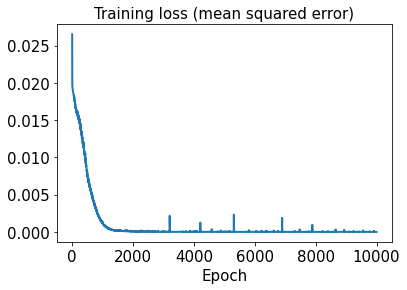

In [31]:
hist1 = history1.history
plt.plot(hist1['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

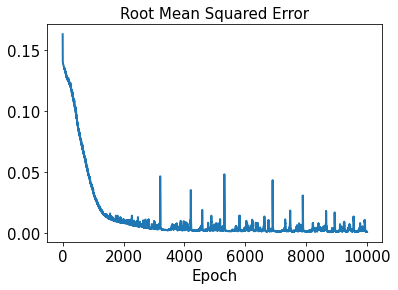

In [32]:
plt.plot(hist1['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [33]:
decoded_sensor_train = sensor_pred.predict(tsr_theta_train)
decoded_sensor_test = sensor_pred.predict(tsr_theta_test)

In [34]:
error_train_sensor = np.abs(decoded_sensor_train - x_train)
error_test_sensor = np.abs(decoded_sensor_test - x_test)

In [35]:
l2_error_sensor_train = np.sum((decoded_sensor_train - x_train)**2) / np.sum(x_train**2)
print(l2_error_sensor_train)

5.4131302e-05


In [36]:
l2_error_sensor_test = np.sum((decoded_sensor_test - x_test)**2) / np.sum(x_test**2)
print(l2_error_sensor_test)

0.0006606408


In [37]:
l2_error_sensor_train_list = []
for i in range(0, len(x_train)):
    l2_error_sensor_train_data = np.sum((decoded_sensor_train[i] - x_train[i])**2) / np.sum(x_train[i]**2)
    l2_error_sensor_train_list.append(l2_error_sensor_train_data)

In [38]:
l2_error_sensor_test_list = []
for i in range(0, len(x_test)):
    l2_error_sensor_test_data = np.sum((decoded_sensor_test[i] - x_test[i])**2) / np.sum(x_test[i]**2)
    l2_error_sensor_test_list.append(l2_error_sensor_test_data)

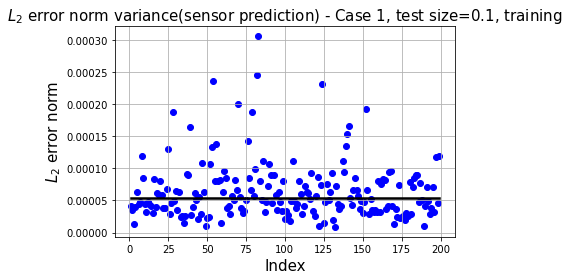

In [61]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_sensor_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_sensor_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance(sensor prediction) - Case 1, test size=0.1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

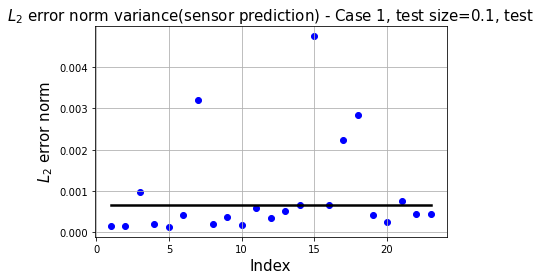

In [62]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_sensor_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_sensor_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance(sensor prediction) - Case 1, test size=0.1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

In [41]:
input_data = tf.keras.Input(shape=(n_sensors, 1))
reshape = tf.keras.layers.Reshape((n_sensors,))(input_data)

x = tf.keras.layers.Dense(units=512, activation='relu', name='firstHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x = tf.keras.layers.Dense(units=512, activation='relu', name='secondHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='thirdHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
x = tf.keras.layers.Dense(units=512, activation='relu', name='fourthHiddenLayer',
                         kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayer')(x)
output_img = tf.keras.layers.Reshape((100,100))(output_data)
# Shallow Decoder (SD)
sd = tf.keras.Model(input_data, output_img)

In [42]:
sd.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 15, 1)]           0         
                                                                 
 reshape_2 (Reshape)         (None, 15)                0         
                                                                 
 firstHiddenLayer (Dense)    (None, 512)               8192      
                                                                 
 secondHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 thirdHiddenLayer (Dense)    (None, 512)               262656    
                                                                 
 fourthHiddenLayer (Dense)   (None, 512)               262656    
                                                                 
 outputLayer (Dense)         (None, 10000)             5130

In [43]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
              loss = tf.keras.losses.MeanSquaredError(),
              metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [44]:
start = datetime.datetime.now()
history = sd.fit(x_train, y_train, epochs=10000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/10000
5/5 [==============================] - 0s 24ms/step - loss: 0.0111 - rmse: 0.1044
Epoch 2/10000
5/5 [==============================] - 0s 26ms/step - loss: 0.0110 - rmse: 0.1041
Epoch 3/10000
5/5 [==============================] - 0s 13ms/step - loss: 0.0109 - rmse: 0.1038
Epoch 4/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0109 - rmse: 0.1034
Epoch 5/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0108 - rmse: 0.1030
Epoch 6/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0107 - rmse: 0.1024
Epoch 7/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0105 - rmse: 0.1016
Epoch 8/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0102 - rmse: 0.1005
Epoch 9/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0099 - rmse: 0.0986
Epoch 10/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0094 - rmse: 0.0959
Epoch 11/10000
5/5 [==========================

5/5 [==============================] - 0s 6ms/step - loss: 0.0037 - rmse: 0.0594
Epoch 87/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0036 - rmse: 0.0589
Epoch 88/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0036 - rmse: 0.0586
Epoch 89/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0582
Epoch 90/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0578
Epoch 91/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0035 - rmse: 0.0575
Epoch 92/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0571
Epoch 93/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0568
Epoch 94/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0034 - rmse: 0.0565
Epoch 95/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0033 - rmse: 0.0562
Epoch 96/10000
5/5 [==============================] - 0

5/5 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0365
Epoch 171/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0362
Epoch 172/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0015 - rmse: 0.0361
Epoch 173/10000
5/5 [==============================] - 0s 5ms/step - loss: 0.0014 - rmse: 0.0358
Epoch 174/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0356
Epoch 175/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0354
Epoch 176/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0351
Epoch 177/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0350
Epoch 178/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0347
Epoch 179/10000
5/5 [==============================] - 0s 6ms/step - loss: 0.0014 - rmse: 0.0345
Epoch 180/10000
5/5 [=========================

5/5 [==============================] - 0s 6ms/step - loss: 7.2600e-04 - rmse: 0.0237
Epoch 253/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.1930e-04 - rmse: 0.0235
Epoch 254/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.1455e-04 - rmse: 0.0234
Epoch 255/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.0894e-04 - rmse: 0.0233
Epoch 256/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.0570e-04 - rmse: 0.0232
Epoch 257/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.9941e-04 - rmse: 0.0231
Epoch 258/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.9559e-04 - rmse: 0.0230
Epoch 259/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.9339e-04 - rmse: 0.0230
Epoch 260/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.8628e-04 - rmse: 0.0228
Epoch 261/10000
5/5 [==============================] - 0s 5ms/step - loss: 6.8055e-04 - rmse: 0.0227
Epoch 

5/5 [==============================] - 0s 6ms/step - loss: 4.5175e-04 - rmse: 0.0169
Epoch 334/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.4883e-04 - rmse: 0.0168
Epoch 335/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.4798e-04 - rmse: 0.0168
Epoch 336/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.4582e-04 - rmse: 0.0167
Epoch 337/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.4380e-04 - rmse: 0.0167
Epoch 338/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.4068e-04 - rmse: 0.0166
Epoch 339/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.4019e-04 - rmse: 0.0166
Epoch 340/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.3767e-04 - rmse: 0.0165
Epoch 341/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.3627e-04 - rmse: 0.0165
Epoch 342/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.3489e-04 - rmse: 0.0164
Epoch 

5/5 [==============================] - 0s 6ms/step - loss: 3.4772e-04 - rmse: 0.0136
Epoch 415/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4710e-04 - rmse: 0.0136
Epoch 416/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4666e-04 - rmse: 0.0136
Epoch 417/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4508e-04 - rmse: 0.0135
Epoch 418/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4471e-04 - rmse: 0.0135
Epoch 419/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4400e-04 - rmse: 0.0135
Epoch 420/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.4369e-04 - rmse: 0.0134
Epoch 421/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4335e-04 - rmse: 0.0134
Epoch 422/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4170e-04 - rmse: 0.0134
Epoch 423/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4083e-04 - rmse: 0.0133
Epoch 

5/5 [==============================] - 0s 5ms/step - loss: 2.9729e-04 - rmse: 0.0117
Epoch 496/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.9684e-04 - rmse: 0.0117
Epoch 497/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.9602e-04 - rmse: 0.0117
Epoch 498/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.9637e-04 - rmse: 0.0117
Epoch 499/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.9575e-04 - rmse: 0.0117
Epoch 500/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.9427e-04 - rmse: 0.0116
Epoch 501/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.9465e-04 - rmse: 0.0116
Epoch 502/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.9380e-04 - rmse: 0.0116
Epoch 503/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.9330e-04 - rmse: 0.0116
Epoch 504/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.9333e-04 - rmse: 0.0116
Epoch 

5/5 [==============================] - 0s 6ms/step - loss: 2.6625e-04 - rmse: 0.0105
Epoch 577/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.6568e-04 - rmse: 0.0105
Epoch 578/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.6552e-04 - rmse: 0.0105
Epoch 579/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.6560e-04 - rmse: 0.0105
Epoch 580/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.6532e-04 - rmse: 0.0105
Epoch 581/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.6487e-04 - rmse: 0.0105
Epoch 582/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.6454e-04 - rmse: 0.0105
Epoch 583/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.6462e-04 - rmse: 0.0105
Epoch 584/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.6358e-04 - rmse: 0.0104
Epoch 585/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.6298e-04 - rmse: 0.0104
Epoch 

5/5 [==============================] - 0s 6ms/step - loss: 2.4287e-04 - rmse: 0.0096
Epoch 658/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.4266e-04 - rmse: 0.0095
Epoch 659/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.4225e-04 - rmse: 0.0095
Epoch 660/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.4185e-04 - rmse: 0.0095
Epoch 661/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.4160e-04 - rmse: 0.0095
Epoch 662/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.4208e-04 - rmse: 0.0095
Epoch 663/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.4148e-04 - rmse: 0.0095
Epoch 664/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.4083e-04 - rmse: 0.0095
Epoch 665/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.4086e-04 - rmse: 0.0095
Epoch 666/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.4065e-04 - rmse: 0.0095
Epoch 

5/5 [==============================] - 0s 5ms/step - loss: 2.2448e-04 - rmse: 0.0088
Epoch 739/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.2416e-04 - rmse: 0.0088
Epoch 740/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.2438e-04 - rmse: 0.0088
Epoch 741/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.2372e-04 - rmse: 0.0087
Epoch 742/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.2319e-04 - rmse: 0.0087
Epoch 743/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.2327e-04 - rmse: 0.0087
Epoch 744/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.2344e-04 - rmse: 0.0087
Epoch 745/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.2240e-04 - rmse: 0.0087
Epoch 746/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.2257e-04 - rmse: 0.0087
Epoch 747/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.2240e-04 - rmse: 0.0087
Epoch 

5/5 [==============================] - 0s 6ms/step - loss: 2.0861e-04 - rmse: 0.0081
Epoch 820/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.0834e-04 - rmse: 0.0081
Epoch 821/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.0813e-04 - rmse: 0.0081
Epoch 822/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.0764e-04 - rmse: 0.0080
Epoch 823/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.0771e-04 - rmse: 0.0080
Epoch 824/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.0740e-04 - rmse: 0.0080
Epoch 825/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.0735e-04 - rmse: 0.0080
Epoch 826/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.0716e-04 - rmse: 0.0080
Epoch 827/10000
5/5 [==============================] - 0s 5ms/step - loss: 2.0748e-04 - rmse: 0.0080
Epoch 828/10000
5/5 [==============================] - 0s 6ms/step - loss: 2.0726e-04 - rmse: 0.0080
Epoch 

5/5 [==============================] - 0s 6ms/step - loss: 1.9536e-04 - rmse: 0.0075
Epoch 901/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.9515e-04 - rmse: 0.0075
Epoch 902/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.9497e-04 - rmse: 0.0075
Epoch 903/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.9515e-04 - rmse: 0.0075
Epoch 904/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.9445e-04 - rmse: 0.0075
Epoch 905/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.9483e-04 - rmse: 0.0075
Epoch 906/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.9418e-04 - rmse: 0.0074
Epoch 907/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.9427e-04 - rmse: 0.0075
Epoch 908/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.9375e-04 - rmse: 0.0074
Epoch 909/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.9372e-04 - rmse: 0.0074
Epoch 

5/5 [==============================] - 0s 6ms/step - loss: 1.8395e-04 - rmse: 0.0070
Epoch 982/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.8394e-04 - rmse: 0.0070
Epoch 983/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.8373e-04 - rmse: 0.0070
Epoch 984/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.8336e-04 - rmse: 0.0070
Epoch 985/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.8285e-04 - rmse: 0.0069
Epoch 986/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.8263e-04 - rmse: 0.0069
Epoch 987/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.8246e-04 - rmse: 0.0069
Epoch 988/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.8217e-04 - rmse: 0.0069
Epoch 989/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.8223e-04 - rmse: 0.0069
Epoch 990/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.8219e-04 - rmse: 0.0069
Epoch 

5/5 [==============================] - 0s 5ms/step - loss: 1.7446e-04 - rmse: 0.0066
Epoch 1062/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.7442e-04 - rmse: 0.0066
Epoch 1063/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.7392e-04 - rmse: 0.0066
Epoch 1064/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.7340e-04 - rmse: 0.0065
Epoch 1065/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.7321e-04 - rmse: 0.0065
Epoch 1066/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.7331e-04 - rmse: 0.0065
Epoch 1067/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.7273e-04 - rmse: 0.0065
Epoch 1068/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.7268e-04 - rmse: 0.0065
Epoch 1069/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.7249e-04 - rmse: 0.0065
Epoch 1070/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.7237e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.6466e-04 - rmse: 0.0061
Epoch 1142/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.6476e-04 - rmse: 0.0061
Epoch 1143/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.6475e-04 - rmse: 0.0061
Epoch 1144/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.6505e-04 - rmse: 0.0062
Epoch 1145/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.6490e-04 - rmse: 0.0061
Epoch 1146/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.6452e-04 - rmse: 0.0061
Epoch 1147/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.6434e-04 - rmse: 0.0061
Epoch 1148/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.6438e-04 - rmse: 0.0061
Epoch 1149/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.6443e-04 - rmse: 0.0061
Epoch 1150/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.6427e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.5708e-04 - rmse: 0.0058
Epoch 1222/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5695e-04 - rmse: 0.0058
Epoch 1223/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5677e-04 - rmse: 0.0058
Epoch 1224/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5647e-04 - rmse: 0.0057
Epoch 1225/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5652e-04 - rmse: 0.0058
Epoch 1226/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5625e-04 - rmse: 0.0057
Epoch 1227/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5626e-04 - rmse: 0.0057
Epoch 1228/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5615e-04 - rmse: 0.0057
Epoch 1229/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5613e-04 - rmse: 0.0057
Epoch 1230/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5598e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.4998e-04 - rmse: 0.0055
Epoch 1302/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4992e-04 - rmse: 0.0055
Epoch 1303/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.5028e-04 - rmse: 0.0055
Epoch 1304/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4982e-04 - rmse: 0.0055
Epoch 1305/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4960e-04 - rmse: 0.0055
Epoch 1306/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4961e-04 - rmse: 0.0055
Epoch 1307/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4935e-04 - rmse: 0.0054
Epoch 1308/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4957e-04 - rmse: 0.0055
Epoch 1309/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4913e-04 - rmse: 0.0054
Epoch 1310/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4902e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.4347e-04 - rmse: 0.0052
Epoch 1382/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4339e-04 - rmse: 0.0052
Epoch 1383/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4344e-04 - rmse: 0.0052
Epoch 1384/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4333e-04 - rmse: 0.0052
Epoch 1385/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4321e-04 - rmse: 0.0052
Epoch 1386/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4312e-04 - rmse: 0.0052
Epoch 1387/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4315e-04 - rmse: 0.0052
Epoch 1388/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4338e-04 - rmse: 0.0052
Epoch 1389/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4323e-04 - rmse: 0.0052
Epoch 1390/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.4312e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.3795e-04 - rmse: 0.0050
Epoch 1462/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3776e-04 - rmse: 0.0050
Epoch 1463/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3789e-04 - rmse: 0.0050
Epoch 1464/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3753e-04 - rmse: 0.0049
Epoch 1465/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3750e-04 - rmse: 0.0049
Epoch 1466/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3755e-04 - rmse: 0.0049
Epoch 1467/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3737e-04 - rmse: 0.0049
Epoch 1468/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3761e-04 - rmse: 0.0050
Epoch 1469/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.3802e-04 - rmse: 0.0050
Epoch 1470/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3798e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.3281e-04 - rmse: 0.0048
Epoch 1542/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3221e-04 - rmse: 0.0047
Epoch 1543/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3213e-04 - rmse: 0.0047
Epoch 1544/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3234e-04 - rmse: 0.0047
Epoch 1545/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3252e-04 - rmse: 0.0048
Epoch 1546/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3225e-04 - rmse: 0.0047
Epoch 1547/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3212e-04 - rmse: 0.0047
Epoch 1548/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3242e-04 - rmse: 0.0048
Epoch 1549/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3243e-04 - rmse: 0.0048
Epoch 1550/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.3235e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.2729e-04 - rmse: 0.0045
Epoch 1622/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2715e-04 - rmse: 0.0045
Epoch 1623/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2698e-04 - rmse: 0.0045
Epoch 1624/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2713e-04 - rmse: 0.0045
Epoch 1625/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2705e-04 - rmse: 0.0045
Epoch 1626/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2710e-04 - rmse: 0.0045
Epoch 1627/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2727e-04 - rmse: 0.0045
Epoch 1628/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2714e-04 - rmse: 0.0045
Epoch 1629/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2698e-04 - rmse: 0.0045
Epoch 1630/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2701e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.2305e-04 - rmse: 0.0043
Epoch 1702/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2289e-04 - rmse: 0.0043
Epoch 1703/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2277e-04 - rmse: 0.0043
Epoch 1704/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2261e-04 - rmse: 0.0043
Epoch 1705/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2259e-04 - rmse: 0.0043
Epoch 1706/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2271e-04 - rmse: 0.0043
Epoch 1707/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2281e-04 - rmse: 0.0043
Epoch 1708/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2294e-04 - rmse: 0.0044
Epoch 1709/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2282e-04 - rmse: 0.0043
Epoch 1710/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.2251e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.1861e-04 - rmse: 0.0041
Epoch 1782/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1855e-04 - rmse: 0.0041
Epoch 1783/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1862e-04 - rmse: 0.0042
Epoch 1784/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1852e-04 - rmse: 0.0042
Epoch 1785/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1868e-04 - rmse: 0.0042
Epoch 1786/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1864e-04 - rmse: 0.0042
Epoch 1787/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1856e-04 - rmse: 0.0042
Epoch 1788/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1867e-04 - rmse: 0.0042
Epoch 1789/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1867e-04 - rmse: 0.0042
Epoch 1790/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1844e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.1490e-04 - rmse: 0.0040
Epoch 1862/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1478e-04 - rmse: 0.0040
Epoch 1863/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.1485e-04 - rmse: 0.0040
Epoch 1864/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1486e-04 - rmse: 0.0040
Epoch 1865/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1477e-04 - rmse: 0.0040
Epoch 1866/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.1463e-04 - rmse: 0.0040
Epoch 1867/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1448e-04 - rmse: 0.0040
Epoch 1868/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1450e-04 - rmse: 0.0040
Epoch 1869/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1482e-04 - rmse: 0.0040
Epoch 1870/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1465e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.1123e-04 - rmse: 0.0039
Epoch 1942/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1112e-04 - rmse: 0.0039
Epoch 1943/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1117e-04 - rmse: 0.0039
Epoch 1944/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1109e-04 - rmse: 0.0039
Epoch 1945/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1094e-04 - rmse: 0.0039
Epoch 1946/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1102e-04 - rmse: 0.0039
Epoch 1947/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1082e-04 - rmse: 0.0039
Epoch 1948/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1088e-04 - rmse: 0.0039
Epoch 1949/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1084e-04 - rmse: 0.0039
Epoch 1950/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.1098e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.0788e-04 - rmse: 0.0038
Epoch 2022/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0775e-04 - rmse: 0.0037
Epoch 2023/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0783e-04 - rmse: 0.0038
Epoch 2024/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0774e-04 - rmse: 0.0038
Epoch 2025/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0781e-04 - rmse: 0.0038
Epoch 2026/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.0795e-04 - rmse: 0.0038
Epoch 2027/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0801e-04 - rmse: 0.0038
Epoch 2028/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0795e-04 - rmse: 0.0038
Epoch 2029/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0796e-04 - rmse: 0.0038
Epoch 2030/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0782e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.0453e-04 - rmse: 0.0036
Epoch 2102/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0444e-04 - rmse: 0.0036
Epoch 2103/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0436e-04 - rmse: 0.0036
Epoch 2104/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0444e-04 - rmse: 0.0036
Epoch 2105/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0445e-04 - rmse: 0.0036
Epoch 2106/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0448e-04 - rmse: 0.0036
Epoch 2107/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0444e-04 - rmse: 0.0036
Epoch 2108/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0421e-04 - rmse: 0.0036
Epoch 2109/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0422e-04 - rmse: 0.0036
Epoch 2110/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0417e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 1.0165e-04 - rmse: 0.0035
Epoch 2182/10000
5/5 [==============================] - 0s 5ms/step - loss: 1.0175e-04 - rmse: 0.0036
Epoch 2183/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0168e-04 - rmse: 0.0035
Epoch 2184/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0185e-04 - rmse: 0.0036
Epoch 2185/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0176e-04 - rmse: 0.0036
Epoch 2186/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0166e-04 - rmse: 0.0036
Epoch 2187/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0184e-04 - rmse: 0.0036
Epoch 2188/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0170e-04 - rmse: 0.0036
Epoch 2189/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0164e-04 - rmse: 0.0036
Epoch 2190/10000
5/5 [==============================] - 0s 6ms/step - loss: 1.0158e-04 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 9.8745e-05 - rmse: 0.0034
Epoch 2262/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.8764e-05 - rmse: 0.0034
Epoch 2263/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.8643e-05 - rmse: 0.0034
Epoch 2264/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.8619e-05 - rmse: 0.0034
Epoch 2265/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.8561e-05 - rmse: 0.0034
Epoch 2266/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.8473e-05 - rmse: 0.0034
Epoch 2267/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.8715e-05 - rmse: 0.0034
Epoch 2268/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.8499e-05 - rmse: 0.0034
Epoch 2269/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.8377e-05 - rmse: 0.0034
Epoch 2270/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.8283e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 9.7070e-05 - rmse: 0.0035
Epoch 2342/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.6797e-05 - rmse: 0.0034
Epoch 2343/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.7808e-05 - rmse: 0.0036
Epoch 2344/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.7386e-05 - rmse: 0.0035
Epoch 2345/10000
5/5 [==============================] - 0s 5ms/step - loss: 9.7613e-05 - rmse: 0.0036
Epoch 2346/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.7934e-05 - rmse: 0.0036
Epoch 2347/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.8530e-05 - rmse: 0.0037
Epoch 2348/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.7091e-05 - rmse: 0.0035
Epoch 2349/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.7053e-05 - rmse: 0.0035
Epoch 2350/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.7786e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 9.3959e-05 - rmse: 0.0033
Epoch 2422/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.3861e-05 - rmse: 0.0033
Epoch 2423/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.3867e-05 - rmse: 0.0033
Epoch 2424/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.4224e-05 - rmse: 0.0034
Epoch 2425/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.4162e-05 - rmse: 0.0034
Epoch 2426/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.4048e-05 - rmse: 0.0033
Epoch 2427/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.3940e-05 - rmse: 0.0033
Epoch 2428/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.3685e-05 - rmse: 0.0033
Epoch 2429/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.3508e-05 - rmse: 0.0033
Epoch 2430/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.3508e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 9.1207e-05 - rmse: 0.0032
Epoch 2502/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.1075e-05 - rmse: 0.0032
Epoch 2503/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.1117e-05 - rmse: 0.0032
Epoch 2504/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.1066e-05 - rmse: 0.0032
Epoch 2505/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.1061e-05 - rmse: 0.0032
Epoch 2506/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.1099e-05 - rmse: 0.0032
Epoch 2507/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.1090e-05 - rmse: 0.0032
Epoch 2508/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.1070e-05 - rmse: 0.0032
Epoch 2509/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.0982e-05 - rmse: 0.0032
Epoch 2510/10000
5/5 [==============================] - 0s 6ms/step - loss: 9.0999e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 8.9112e-05 - rmse: 0.0031
Epoch 2582/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.8958e-05 - rmse: 0.0031
Epoch 2583/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.8923e-05 - rmse: 0.0031
Epoch 2584/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.8899e-05 - rmse: 0.0031
Epoch 2585/10000
5/5 [==============================] - 0s 5ms/step - loss: 8.8960e-05 - rmse: 0.0031
Epoch 2586/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.8933e-05 - rmse: 0.0031
Epoch 2587/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.8817e-05 - rmse: 0.0031
Epoch 2588/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.8746e-05 - rmse: 0.0031
Epoch 2589/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.8749e-05 - rmse: 0.0031
Epoch 2590/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.8877e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 8.7076e-05 - rmse: 0.0031
Epoch 2662/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.7195e-05 - rmse: 0.0031
Epoch 2663/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.6883e-05 - rmse: 0.0031
Epoch 2664/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.6888e-05 - rmse: 0.0031
Epoch 2665/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.6730e-05 - rmse: 0.0031
Epoch 2666/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.6662e-05 - rmse: 0.0030
Epoch 2667/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.6736e-05 - rmse: 0.0031
Epoch 2668/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.6794e-05 - rmse: 0.0031
Epoch 2669/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.6750e-05 - rmse: 0.0031
Epoch 2670/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.6686e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 8.5067e-05 - rmse: 0.0031
Epoch 2742/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.5099e-05 - rmse: 0.0031
Epoch 2743/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.5143e-05 - rmse: 0.0031
Epoch 2744/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.5024e-05 - rmse: 0.0031
Epoch 2745/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.4805e-05 - rmse: 0.0030
Epoch 2746/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.4921e-05 - rmse: 0.0030
Epoch 2747/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.4667e-05 - rmse: 0.0030
Epoch 2748/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.4617e-05 - rmse: 0.0030
Epoch 2749/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.4579e-05 - rmse: 0.0030
Epoch 2750/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.4471e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 8.2856e-05 - rmse: 0.0030
Epoch 2822/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.2716e-05 - rmse: 0.0029
Epoch 2823/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.2713e-05 - rmse: 0.0029
Epoch 2824/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.2787e-05 - rmse: 0.0029
Epoch 2825/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.2801e-05 - rmse: 0.0030
Epoch 2826/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.2617e-05 - rmse: 0.0029
Epoch 2827/10000
5/5 [==============================] - 0s 5ms/step - loss: 8.2551e-05 - rmse: 0.0029
Epoch 2828/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.2503e-05 - rmse: 0.0029
Epoch 2829/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.2533e-05 - rmse: 0.0029
Epoch 2830/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.2620e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 8.0867e-05 - rmse: 0.0029
Epoch 2902/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.0763e-05 - rmse: 0.0029
Epoch 2903/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.0855e-05 - rmse: 0.0029
Epoch 2904/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.0788e-05 - rmse: 0.0029
Epoch 2905/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.0744e-05 - rmse: 0.0029
Epoch 2906/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.0823e-05 - rmse: 0.0029
Epoch 2907/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.0787e-05 - rmse: 0.0029
Epoch 2908/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.0833e-05 - rmse: 0.0029
Epoch 2909/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.0865e-05 - rmse: 0.0029
Epoch 2910/10000
5/5 [==============================] - 0s 6ms/step - loss: 8.0715e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 7.9062e-05 - rmse: 0.0028
Epoch 2982/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.9073e-05 - rmse: 0.0028
Epoch 2983/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.9116e-05 - rmse: 0.0028
Epoch 2984/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.9081e-05 - rmse: 0.0028
Epoch 2985/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.9218e-05 - rmse: 0.0029
Epoch 2986/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.9180e-05 - rmse: 0.0029
Epoch 2987/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.9131e-05 - rmse: 0.0029
Epoch 2988/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.8923e-05 - rmse: 0.0028
Epoch 2989/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.8851e-05 - rmse: 0.0028
Epoch 2990/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.8801e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 7.7627e-05 - rmse: 0.0028
Epoch 3062/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.7657e-05 - rmse: 0.0028
Epoch 3063/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.7639e-05 - rmse: 0.0028
Epoch 3064/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.7504e-05 - rmse: 0.0028
Epoch 3065/10000
5/5 [==============================] - 0s 5ms/step - loss: 7.7428e-05 - rmse: 0.0028
Epoch 3066/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.7393e-05 - rmse: 0.0028
Epoch 3067/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.7414e-05 - rmse: 0.0028
Epoch 3068/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.7396e-05 - rmse: 0.0028
Epoch 3069/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.7342e-05 - rmse: 0.0028
Epoch 3070/10000
5/5 [==============================] - 0s 5ms/step - loss: 7.7257e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 7.5864e-05 - rmse: 0.0028
Epoch 3142/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.5713e-05 - rmse: 0.0027
Epoch 3143/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.5778e-05 - rmse: 0.0028
Epoch 3144/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.5703e-05 - rmse: 0.0027
Epoch 3145/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.5740e-05 - rmse: 0.0028
Epoch 3146/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.5731e-05 - rmse: 0.0028
Epoch 3147/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.5763e-05 - rmse: 0.0028
Epoch 3148/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.5719e-05 - rmse: 0.0028
Epoch 3149/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.5551e-05 - rmse: 0.0027
Epoch 3150/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.5472e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 7.4230e-05 - rmse: 0.0027
Epoch 3222/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.4131e-05 - rmse: 0.0027
Epoch 3223/10000
5/5 [==============================] - 0s 7ms/step - loss: 7.4149e-05 - rmse: 0.0027
Epoch 3224/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.4210e-05 - rmse: 0.0027
Epoch 3225/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.4490e-05 - rmse: 0.0028
Epoch 3226/10000
5/5 [==============================] - 0s 5ms/step - loss: 7.4385e-05 - rmse: 0.0028
Epoch 3227/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.4261e-05 - rmse: 0.0027
Epoch 3228/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.4090e-05 - rmse: 0.0027
Epoch 3229/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.4028e-05 - rmse: 0.0027
Epoch 3230/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.4224e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 7.2930e-05 - rmse: 0.0027
Epoch 3302/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.2990e-05 - rmse: 0.0027
Epoch 3303/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.2795e-05 - rmse: 0.0027
Epoch 3304/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.2779e-05 - rmse: 0.0027
Epoch 3305/10000
5/5 [==============================] - 0s 5ms/step - loss: 7.2734e-05 - rmse: 0.0027
Epoch 3306/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.2699e-05 - rmse: 0.0027
Epoch 3307/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.2785e-05 - rmse: 0.0027
Epoch 3308/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.2686e-05 - rmse: 0.0027
Epoch 3309/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.2606e-05 - rmse: 0.0027
Epoch 3310/10000
5/5 [==============================] - 0s 5ms/step - loss: 7.2608e-05 - rmse: 0.00

5/5 [==============================] - 0s 7ms/step - loss: 7.1785e-05 - rmse: 0.0027
Epoch 3382/10000
5/5 [==============================] - 0s 5ms/step - loss: 7.1945e-05 - rmse: 0.0028
Epoch 3383/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.1821e-05 - rmse: 0.0027
Epoch 3384/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.1684e-05 - rmse: 0.0027
Epoch 3385/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.1717e-05 - rmse: 0.0027
Epoch 3386/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.1926e-05 - rmse: 0.0028
Epoch 3387/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.1855e-05 - rmse: 0.0028
Epoch 3388/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.1664e-05 - rmse: 0.0027
Epoch 3389/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.1420e-05 - rmse: 0.0027
Epoch 3390/10000
5/5 [==============================] - 0s 6ms/step - loss: 7.1450e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 6.9911e-05 - rmse: 0.0026
Epoch 3462/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.9865e-05 - rmse: 0.0026
Epoch 3463/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.9828e-05 - rmse: 0.0026
Epoch 3464/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.9828e-05 - rmse: 0.0026
Epoch 3465/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.9871e-05 - rmse: 0.0026
Epoch 3466/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.9940e-05 - rmse: 0.0026
Epoch 3467/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.9977e-05 - rmse: 0.0026
Epoch 3468/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.9955e-05 - rmse: 0.0026
Epoch 3469/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.9883e-05 - rmse: 0.0026
Epoch 3470/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.9794e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 6.8604e-05 - rmse: 0.0026
Epoch 3542/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.8835e-05 - rmse: 0.0026
Epoch 3543/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.8738e-05 - rmse: 0.0026
Epoch 3544/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.9064e-05 - rmse: 0.0027
Epoch 3545/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.9019e-05 - rmse: 0.0027
Epoch 3546/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.8863e-05 - rmse: 0.0026
Epoch 3547/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.8918e-05 - rmse: 0.0026
Epoch 3548/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.8938e-05 - rmse: 0.0026
Epoch 3549/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.8854e-05 - rmse: 0.0026
Epoch 3550/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.8731e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 6.7673e-05 - rmse: 0.0026
Epoch 3622/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.7668e-05 - rmse: 0.0026
Epoch 3623/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.7557e-05 - rmse: 0.0026
Epoch 3624/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.7683e-05 - rmse: 0.0026
Epoch 3625/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.7673e-05 - rmse: 0.0026
Epoch 3626/10000
5/5 [==============================] - 0s 5ms/step - loss: 6.7682e-05 - rmse: 0.0026
Epoch 3627/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.7668e-05 - rmse: 0.0026
Epoch 3628/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.7711e-05 - rmse: 0.0026
Epoch 3629/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.7586e-05 - rmse: 0.0026
Epoch 3630/10000
5/5 [==============================] - 0s 5ms/step - loss: 6.7447e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 6.6298e-05 - rmse: 0.0025
Epoch 3702/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.6431e-05 - rmse: 0.0026
Epoch 3703/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.6540e-05 - rmse: 0.0026
Epoch 3704/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.6685e-05 - rmse: 0.0026
Epoch 3705/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.6703e-05 - rmse: 0.0026
Epoch 3706/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.6641e-05 - rmse: 0.0026
Epoch 3707/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.6375e-05 - rmse: 0.0026
Epoch 3708/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.6267e-05 - rmse: 0.0025
Epoch 3709/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.6210e-05 - rmse: 0.0025
Epoch 3710/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.6308e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 6.5258e-05 - rmse: 0.0025
Epoch 3782/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.5196e-05 - rmse: 0.0025
Epoch 3783/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.5117e-05 - rmse: 0.0025
Epoch 3784/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.5042e-05 - rmse: 0.0025
Epoch 3785/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.5008e-05 - rmse: 0.0025
Epoch 3786/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.5077e-05 - rmse: 0.0025
Epoch 3787/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.5133e-05 - rmse: 0.0025
Epoch 3788/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.5052e-05 - rmse: 0.0025
Epoch 3789/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.4976e-05 - rmse: 0.0025
Epoch 3790/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.5175e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 6.3977e-05 - rmse: 0.0025
Epoch 3862/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.3938e-05 - rmse: 0.0025
Epoch 3863/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.3933e-05 - rmse: 0.0025
Epoch 3864/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.3864e-05 - rmse: 0.0025
Epoch 3865/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.3855e-05 - rmse: 0.0025
Epoch 3866/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.3834e-05 - rmse: 0.0025
Epoch 3867/10000
5/5 [==============================] - 0s 5ms/step - loss: 6.3873e-05 - rmse: 0.0025
Epoch 3868/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.3791e-05 - rmse: 0.0024
Epoch 3869/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.3814e-05 - rmse: 0.0025
Epoch 3870/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.3852e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 6.3564e-05 - rmse: 0.0026
Epoch 3942/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.3316e-05 - rmse: 0.0025
Epoch 3943/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.3375e-05 - rmse: 0.0025
Epoch 3944/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.3437e-05 - rmse: 0.0026
Epoch 3945/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.3473e-05 - rmse: 0.0026
Epoch 3946/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.3426e-05 - rmse: 0.0026
Epoch 3947/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.3280e-05 - rmse: 0.0025
Epoch 3948/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.3182e-05 - rmse: 0.0025
Epoch 3949/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.3218e-05 - rmse: 0.0025
Epoch 3950/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.3411e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 6.2323e-05 - rmse: 0.0025
Epoch 4022/10000
5/5 [==============================] - 0s 5ms/step - loss: 6.2191e-05 - rmse: 0.0025
Epoch 4023/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.2201e-05 - rmse: 0.0025
Epoch 4024/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.2386e-05 - rmse: 0.0025
Epoch 4025/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.2154e-05 - rmse: 0.0025
Epoch 4026/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.2039e-05 - rmse: 0.0025
Epoch 4027/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.1868e-05 - rmse: 0.0024
Epoch 4028/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.1801e-05 - rmse: 0.0024
Epoch 4029/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.1791e-05 - rmse: 0.0024
Epoch 4030/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.1781e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 6.1012e-05 - rmse: 0.0024
Epoch 4102/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.1106e-05 - rmse: 0.0025
Epoch 4103/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.1022e-05 - rmse: 0.0024
Epoch 4104/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.0879e-05 - rmse: 0.0024
Epoch 4105/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.1087e-05 - rmse: 0.0025
Epoch 4106/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.1042e-05 - rmse: 0.0024
Epoch 4107/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.0883e-05 - rmse: 0.0024
Epoch 4108/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.0790e-05 - rmse: 0.0024
Epoch 4109/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.0748e-05 - rmse: 0.0024
Epoch 4110/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.0725e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 6.0159e-05 - rmse: 0.0024
Epoch 4182/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.0055e-05 - rmse: 0.0024
Epoch 4183/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.9980e-05 - rmse: 0.0024
Epoch 4184/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.9915e-05 - rmse: 0.0024
Epoch 4185/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.9886e-05 - rmse: 0.0024
Epoch 4186/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.9943e-05 - rmse: 0.0024
Epoch 4187/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.9917e-05 - rmse: 0.0024
Epoch 4188/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.0140e-05 - rmse: 0.0024
Epoch 4189/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.0690e-05 - rmse: 0.0026
Epoch 4190/10000
5/5 [==============================] - 0s 6ms/step - loss: 6.0592e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 5.9391e-05 - rmse: 0.0024
Epoch 4262/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.9294e-05 - rmse: 0.0024
Epoch 4263/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.9033e-05 - rmse: 0.0024
Epoch 4264/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.9013e-05 - rmse: 0.0024
Epoch 4265/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.8970e-05 - rmse: 0.0024
Epoch 4266/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.9014e-05 - rmse: 0.0024
Epoch 4267/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.8947e-05 - rmse: 0.0024
Epoch 4268/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.8939e-05 - rmse: 0.0024
Epoch 4269/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.9027e-05 - rmse: 0.0024
Epoch 4270/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.9174e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 5.8428e-05 - rmse: 0.0024
Epoch 4342/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.8246e-05 - rmse: 0.0024
Epoch 4343/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.8346e-05 - rmse: 0.0024
Epoch 4344/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.8317e-05 - rmse: 0.0024
Epoch 4345/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.8202e-05 - rmse: 0.0024
Epoch 4346/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.8278e-05 - rmse: 0.0024
Epoch 4347/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.8183e-05 - rmse: 0.0024
Epoch 4348/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.8112e-05 - rmse: 0.0024
Epoch 4349/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.8008e-05 - rmse: 0.0023
Epoch 4350/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.8028e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 5.7454e-05 - rmse: 0.0024
Epoch 4422/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.7392e-05 - rmse: 0.0023
Epoch 4423/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.7341e-05 - rmse: 0.0023
Epoch 4424/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.7233e-05 - rmse: 0.0023
Epoch 4425/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.7197e-05 - rmse: 0.0023
Epoch 4426/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.7056e-05 - rmse: 0.0023
Epoch 4427/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.6966e-05 - rmse: 0.0023
Epoch 4428/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.6984e-05 - rmse: 0.0023
Epoch 4429/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.6953e-05 - rmse: 0.0023
Epoch 4430/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.6940e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 5.6370e-05 - rmse: 0.0023
Epoch 4502/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.6376e-05 - rmse: 0.0023
Epoch 4503/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.6361e-05 - rmse: 0.0023
Epoch 4504/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.6239e-05 - rmse: 0.0023
Epoch 4505/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.6253e-05 - rmse: 0.0023
Epoch 4506/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.6308e-05 - rmse: 0.0023
Epoch 4507/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.6225e-05 - rmse: 0.0023
Epoch 4508/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.6194e-05 - rmse: 0.0023
Epoch 4509/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.6253e-05 - rmse: 0.0023
Epoch 4510/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.6244e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 5.5705e-05 - rmse: 0.0023
Epoch 4582/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.5779e-05 - rmse: 0.0023
Epoch 4583/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.5754e-05 - rmse: 0.0023
Epoch 4584/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.5701e-05 - rmse: 0.0023
Epoch 4585/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.5690e-05 - rmse: 0.0023
Epoch 4586/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.5580e-05 - rmse: 0.0023
Epoch 4587/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.5413e-05 - rmse: 0.0022
Epoch 4588/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.5427e-05 - rmse: 0.0023
Epoch 4589/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.5417e-05 - rmse: 0.0023
Epoch 4590/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.5488e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 5.5247e-05 - rmse: 0.0024
Epoch 4662/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.5533e-05 - rmse: 0.0024
Epoch 4663/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.5611e-05 - rmse: 0.0024
Epoch 4664/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.5633e-05 - rmse: 0.0024
Epoch 4665/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.5466e-05 - rmse: 0.0024
Epoch 4666/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.5194e-05 - rmse: 0.0023
Epoch 4667/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.5048e-05 - rmse: 0.0023
Epoch 4668/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.4966e-05 - rmse: 0.0023
Epoch 4669/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.5269e-05 - rmse: 0.0024
Epoch 4670/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.5634e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 5.4248e-05 - rmse: 0.0023
Epoch 4742/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.4381e-05 - rmse: 0.0023
Epoch 4743/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.4583e-05 - rmse: 0.0024
Epoch 4744/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.4350e-05 - rmse: 0.0023
Epoch 4745/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.4227e-05 - rmse: 0.0023
Epoch 4746/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.4155e-05 - rmse: 0.0023
Epoch 4747/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.4302e-05 - rmse: 0.0023
Epoch 4748/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.4339e-05 - rmse: 0.0023
Epoch 4749/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.4067e-05 - rmse: 0.0023
Epoch 4750/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.4129e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 5.3600e-05 - rmse: 0.0023
Epoch 4822/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.3535e-05 - rmse: 0.0023
Epoch 4823/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.3371e-05 - rmse: 0.0022
Epoch 4824/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.3323e-05 - rmse: 0.0022
Epoch 4825/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.3312e-05 - rmse: 0.0022
Epoch 4826/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.3232e-05 - rmse: 0.0022
Epoch 4827/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.3257e-05 - rmse: 0.0022
Epoch 4828/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.3500e-05 - rmse: 0.0023
Epoch 4829/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.3585e-05 - rmse: 0.0023
Epoch 4830/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.3646e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 5.3713e-05 - rmse: 0.0024
Epoch 4902/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.3703e-05 - rmse: 0.0024
Epoch 4903/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.3768e-05 - rmse: 0.0024
Epoch 4904/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.3320e-05 - rmse: 0.0024
Epoch 4905/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.3557e-05 - rmse: 0.0024
Epoch 4906/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.3410e-05 - rmse: 0.0024
Epoch 4907/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.2971e-05 - rmse: 0.0023
Epoch 4908/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.2860e-05 - rmse: 0.0023
Epoch 4909/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.2670e-05 - rmse: 0.0022
Epoch 4910/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.2615e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 5.1915e-05 - rmse: 0.0022
Epoch 4982/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.1863e-05 - rmse: 0.0022
Epoch 4983/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.1833e-05 - rmse: 0.0022
Epoch 4984/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.2001e-05 - rmse: 0.0022
Epoch 4985/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.1922e-05 - rmse: 0.0022
Epoch 4986/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.1934e-05 - rmse: 0.0022
Epoch 4987/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.1941e-05 - rmse: 0.0022
Epoch 4988/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.1929e-05 - rmse: 0.0022
Epoch 4989/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.1837e-05 - rmse: 0.0022
Epoch 4990/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.1801e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 5.1586e-05 - rmse: 0.0022
Epoch 5062/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.1871e-05 - rmse: 0.0023
Epoch 5063/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.2140e-05 - rmse: 0.0024
Epoch 5064/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.2474e-05 - rmse: 0.0024
Epoch 5065/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.2140e-05 - rmse: 0.0024
Epoch 5066/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.1780e-05 - rmse: 0.0023
Epoch 5067/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.1947e-05 - rmse: 0.0023
Epoch 5068/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.1976e-05 - rmse: 0.0023
Epoch 5069/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.2154e-05 - rmse: 0.0024
Epoch 5070/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.1924e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 5.0902e-05 - rmse: 0.0022
Epoch 5142/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.0821e-05 - rmse: 0.0022
Epoch 5143/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.0663e-05 - rmse: 0.0022
Epoch 5144/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.0569e-05 - rmse: 0.0021
Epoch 5145/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.0546e-05 - rmse: 0.0021
Epoch 5146/10000
5/5 [==============================] - 0s 5ms/step - loss: 5.0540e-05 - rmse: 0.0021
Epoch 5147/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.0675e-05 - rmse: 0.0022
Epoch 5148/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.0535e-05 - rmse: 0.0021
Epoch 5149/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.0572e-05 - rmse: 0.0021
Epoch 5150/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.0620e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 5.0239e-05 - rmse: 0.0022
Epoch 5222/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.0216e-05 - rmse: 0.0022
Epoch 5223/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.0163e-05 - rmse: 0.0022
Epoch 5224/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.9966e-05 - rmse: 0.0021
Epoch 5225/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.9906e-05 - rmse: 0.0021
Epoch 5226/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.0007e-05 - rmse: 0.0021
Epoch 5227/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.9931e-05 - rmse: 0.0021
Epoch 5228/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.9982e-05 - rmse: 0.0021
Epoch 5229/10000
5/5 [==============================] - 0s 6ms/step - loss: 5.0011e-05 - rmse: 0.0021
Epoch 5230/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.9954e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 4.9456e-05 - rmse: 0.0021
Epoch 5302/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.9472e-05 - rmse: 0.0021
Epoch 5303/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.9459e-05 - rmse: 0.0021
Epoch 5304/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.9435e-05 - rmse: 0.0021
Epoch 5305/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.9347e-05 - rmse: 0.0021
Epoch 5306/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.9359e-05 - rmse: 0.0021
Epoch 5307/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.9449e-05 - rmse: 0.0021
Epoch 5308/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.9294e-05 - rmse: 0.0021
Epoch 5309/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.9213e-05 - rmse: 0.0021
Epoch 5310/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.9179e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 4.8913e-05 - rmse: 0.0021
Epoch 5382/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.8853e-05 - rmse: 0.0021
Epoch 5383/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.8793e-05 - rmse: 0.0021
Epoch 5384/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.8706e-05 - rmse: 0.0021
Epoch 5385/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.8849e-05 - rmse: 0.0021
Epoch 5386/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.8803e-05 - rmse: 0.0021
Epoch 5387/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.8766e-05 - rmse: 0.0021
Epoch 5388/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.8722e-05 - rmse: 0.0021
Epoch 5389/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.8807e-05 - rmse: 0.0021
Epoch 5390/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.8783e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 4.8253e-05 - rmse: 0.0021
Epoch 5462/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.8240e-05 - rmse: 0.0021
Epoch 5463/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.8275e-05 - rmse: 0.0021
Epoch 5464/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.8294e-05 - rmse: 0.0021
Epoch 5465/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.8243e-05 - rmse: 0.0021
Epoch 5466/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.8169e-05 - rmse: 0.0021
Epoch 5467/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.8167e-05 - rmse: 0.0021
Epoch 5468/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.8155e-05 - rmse: 0.0021
Epoch 5469/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.8100e-05 - rmse: 0.0021
Epoch 5470/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.8050e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 4.7844e-05 - rmse: 0.0021
Epoch 5542/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.7744e-05 - rmse: 0.0021
Epoch 5543/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.7978e-05 - rmse: 0.0021
Epoch 5544/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.7986e-05 - rmse: 0.0021
Epoch 5545/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.8068e-05 - rmse: 0.0022
Epoch 5546/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.8153e-05 - rmse: 0.0022
Epoch 5547/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.7918e-05 - rmse: 0.0021
Epoch 5548/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.7828e-05 - rmse: 0.0021
Epoch 5549/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.7824e-05 - rmse: 0.0021
Epoch 5550/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.7824e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 4.7246e-05 - rmse: 0.0021
Epoch 5622/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.7191e-05 - rmse: 0.0021
Epoch 5623/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.7134e-05 - rmse: 0.0020
Epoch 5624/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.7058e-05 - rmse: 0.0020
Epoch 5625/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.7211e-05 - rmse: 0.0021
Epoch 5626/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.7160e-05 - rmse: 0.0021
Epoch 5627/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.7061e-05 - rmse: 0.0020
Epoch 5628/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.7159e-05 - rmse: 0.0021
Epoch 5629/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.7314e-05 - rmse: 0.0021
Epoch 5630/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.7234e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 4.6494e-05 - rmse: 0.0020
Epoch 5702/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.6535e-05 - rmse: 0.0020
Epoch 5703/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.6552e-05 - rmse: 0.0020
Epoch 5704/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.6675e-05 - rmse: 0.0021
Epoch 5705/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.6605e-05 - rmse: 0.0020
Epoch 5706/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.6682e-05 - rmse: 0.0021
Epoch 5707/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.6709e-05 - rmse: 0.0021
Epoch 5708/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.6671e-05 - rmse: 0.0021
Epoch 5709/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.6697e-05 - rmse: 0.0021
Epoch 5710/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.6662e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 4.6103e-05 - rmse: 0.0020
Epoch 5782/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.6150e-05 - rmse: 0.0020
Epoch 5783/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.6121e-05 - rmse: 0.0020
Epoch 5784/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.6221e-05 - rmse: 0.0020
Epoch 5785/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.6167e-05 - rmse: 0.0020
Epoch 5786/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.6224e-05 - rmse: 0.0021
Epoch 5787/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.6167e-05 - rmse: 0.0020
Epoch 5788/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.6257e-05 - rmse: 0.0021
Epoch 5789/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.6192e-05 - rmse: 0.0020
Epoch 5790/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.6290e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 4.6142e-05 - rmse: 0.0021
Epoch 5862/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.5897e-05 - rmse: 0.0021
Epoch 5863/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.5921e-05 - rmse: 0.0021
Epoch 5864/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.5832e-05 - rmse: 0.0021
Epoch 5865/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.5700e-05 - rmse: 0.0020
Epoch 5866/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.5559e-05 - rmse: 0.0020
Epoch 5867/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.5599e-05 - rmse: 0.0020
Epoch 5868/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.5686e-05 - rmse: 0.0020
Epoch 5869/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.5801e-05 - rmse: 0.0021
Epoch 5870/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.5632e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 4.5489e-05 - rmse: 0.0021
Epoch 5942/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.5453e-05 - rmse: 0.0021
Epoch 5943/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.5497e-05 - rmse: 0.0021
Epoch 5944/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.6542e-05 - rmse: 0.0023
Epoch 5945/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.6024e-05 - rmse: 0.0022
Epoch 5946/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.5850e-05 - rmse: 0.0022
Epoch 5947/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.6123e-05 - rmse: 0.0022
Epoch 5948/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.5836e-05 - rmse: 0.0022
Epoch 5949/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.6106e-05 - rmse: 0.0022
Epoch 5950/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.6500e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 4.4745e-05 - rmse: 0.0020
Epoch 6022/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.4872e-05 - rmse: 0.0020
Epoch 6023/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.4828e-05 - rmse: 0.0020
Epoch 6024/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.4952e-05 - rmse: 0.0021
Epoch 6025/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.4856e-05 - rmse: 0.0020
Epoch 6026/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.4977e-05 - rmse: 0.0021
Epoch 6027/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.4928e-05 - rmse: 0.0020
Epoch 6028/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.4793e-05 - rmse: 0.0020
Epoch 6029/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.4910e-05 - rmse: 0.0020
Epoch 6030/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.4897e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 4.4561e-05 - rmse: 0.0021
Epoch 6102/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.4633e-05 - rmse: 0.0021
Epoch 6103/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.4457e-05 - rmse: 0.0020
Epoch 6104/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.4347e-05 - rmse: 0.0020
Epoch 6105/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.4312e-05 - rmse: 0.0020
Epoch 6106/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.4270e-05 - rmse: 0.0020
Epoch 6107/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.4224e-05 - rmse: 0.0020
Epoch 6108/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.4294e-05 - rmse: 0.0020
Epoch 6109/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.4380e-05 - rmse: 0.0020
Epoch 6110/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.4303e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 4.4548e-05 - rmse: 0.0021
Epoch 6182/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.4837e-05 - rmse: 0.0022
Epoch 6183/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.4884e-05 - rmse: 0.0022
Epoch 6184/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.4627e-05 - rmse: 0.0022
Epoch 6185/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.4720e-05 - rmse: 0.0022
Epoch 6186/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.4999e-05 - rmse: 0.0022
Epoch 6187/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.4627e-05 - rmse: 0.0022
Epoch 6188/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.4959e-05 - rmse: 0.0022
Epoch 6189/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.5079e-05 - rmse: 0.0023
Epoch 6190/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.5026e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 4.3450e-05 - rmse: 0.0020
Epoch 6262/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.3443e-05 - rmse: 0.0020
Epoch 6263/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.3388e-05 - rmse: 0.0019
Epoch 6264/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.3404e-05 - rmse: 0.0020
Epoch 6265/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.3381e-05 - rmse: 0.0019
Epoch 6266/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.3469e-05 - rmse: 0.0020
Epoch 6267/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.3457e-05 - rmse: 0.0020
Epoch 6268/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.3547e-05 - rmse: 0.0020
Epoch 6269/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.3561e-05 - rmse: 0.0020
Epoch 6270/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.3746e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 4.3524e-05 - rmse: 0.0021
Epoch 6342/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.3372e-05 - rmse: 0.0020
Epoch 6343/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.3345e-05 - rmse: 0.0020
Epoch 6344/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.3341e-05 - rmse: 0.0020
Epoch 6345/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.3250e-05 - rmse: 0.0020
Epoch 6346/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.3241e-05 - rmse: 0.0020
Epoch 6347/10000
5/5 [==============================] - 0s 7ms/step - loss: 4.3240e-05 - rmse: 0.0020
Epoch 6348/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.3193e-05 - rmse: 0.0020
Epoch 6349/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.3107e-05 - rmse: 0.0020
Epoch 6350/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.3148e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 4.2540e-05 - rmse: 0.0019
Epoch 6422/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.2569e-05 - rmse: 0.0019
Epoch 6423/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.2563e-05 - rmse: 0.0019
Epoch 6424/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.2538e-05 - rmse: 0.0019
Epoch 6425/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.2498e-05 - rmse: 0.0019
Epoch 6426/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.2568e-05 - rmse: 0.0019
Epoch 6427/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.2613e-05 - rmse: 0.0019
Epoch 6428/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.2556e-05 - rmse: 0.0019
Epoch 6429/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.2630e-05 - rmse: 0.0019
Epoch 6430/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.2706e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 4.2726e-05 - rmse: 0.0020
Epoch 6502/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.2606e-05 - rmse: 0.0020
Epoch 6503/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.2670e-05 - rmse: 0.0020
Epoch 6504/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.2514e-05 - rmse: 0.0020
Epoch 6505/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.2390e-05 - rmse: 0.0020
Epoch 6506/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.2409e-05 - rmse: 0.0020
Epoch 6507/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.2494e-05 - rmse: 0.0020
Epoch 6508/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.2509e-05 - rmse: 0.0020
Epoch 6509/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.2486e-05 - rmse: 0.0020
Epoch 6510/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.2508e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 4.2297e-05 - rmse: 0.0020
Epoch 6582/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.2293e-05 - rmse: 0.0020
Epoch 6583/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.2148e-05 - rmse: 0.0020
Epoch 6584/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.2136e-05 - rmse: 0.0020
Epoch 6585/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.2011e-05 - rmse: 0.0020
Epoch 6586/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.1960e-05 - rmse: 0.0019
Epoch 6587/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.1989e-05 - rmse: 0.0020
Epoch 6588/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.2114e-05 - rmse: 0.0020
Epoch 6589/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.2089e-05 - rmse: 0.0020
Epoch 6590/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.1883e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 4.4210e-05 - rmse: 0.0025
Epoch 6662/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.3758e-05 - rmse: 0.0024
Epoch 6663/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.3501e-05 - rmse: 0.0024
Epoch 6664/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.3258e-05 - rmse: 0.0023
Epoch 6665/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.2427e-05 - rmse: 0.0021
Epoch 6666/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.2560e-05 - rmse: 0.0022
Epoch 6667/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.2132e-05 - rmse: 0.0021
Epoch 6668/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.1916e-05 - rmse: 0.0020
Epoch 6669/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.1939e-05 - rmse: 0.0020
Epoch 6670/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.1781e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 4.1187e-05 - rmse: 0.0019
Epoch 6742/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.1189e-05 - rmse: 0.0019
Epoch 6743/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.1220e-05 - rmse: 0.0019
Epoch 6744/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.1175e-05 - rmse: 0.0019
Epoch 6745/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.1143e-05 - rmse: 0.0019
Epoch 6746/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.1137e-05 - rmse: 0.0019
Epoch 6747/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.1101e-05 - rmse: 0.0019
Epoch 6748/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.1262e-05 - rmse: 0.0019
Epoch 6749/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.1282e-05 - rmse: 0.0019
Epoch 6750/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.1300e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 4.1770e-05 - rmse: 0.0021
Epoch 6822/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.1720e-05 - rmse: 0.0021
Epoch 6823/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.1956e-05 - rmse: 0.0022
Epoch 6824/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.1875e-05 - rmse: 0.0022
Epoch 6825/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.1611e-05 - rmse: 0.0021
Epoch 6826/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.1378e-05 - rmse: 0.0020
Epoch 6827/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.1248e-05 - rmse: 0.0020
Epoch 6828/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.1254e-05 - rmse: 0.0020
Epoch 6829/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.1050e-05 - rmse: 0.0020
Epoch 6830/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.0983e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 4.1119e-05 - rmse: 0.0020
Epoch 6902/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.1361e-05 - rmse: 0.0021
Epoch 6903/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.1034e-05 - rmse: 0.0020
Epoch 6904/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.0802e-05 - rmse: 0.0020
Epoch 6905/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.0751e-05 - rmse: 0.0020
Epoch 6906/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.0795e-05 - rmse: 0.0020
Epoch 6907/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.0779e-05 - rmse: 0.0020
Epoch 6908/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.0747e-05 - rmse: 0.0020
Epoch 6909/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.0535e-05 - rmse: 0.0019
Epoch 6910/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.0498e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 4.0243e-05 - rmse: 0.0019
Epoch 6982/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.0272e-05 - rmse: 0.0019
Epoch 6983/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.0446e-05 - rmse: 0.0019
Epoch 6984/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.0366e-05 - rmse: 0.0019
Epoch 6985/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.0243e-05 - rmse: 0.0019
Epoch 6986/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.0268e-05 - rmse: 0.0019
Epoch 6987/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.0258e-05 - rmse: 0.0019
Epoch 6988/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.0562e-05 - rmse: 0.0020
Epoch 6989/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.0847e-05 - rmse: 0.0021
Epoch 6990/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.0669e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 4.0647e-05 - rmse: 0.0021
Epoch 7062/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.0808e-05 - rmse: 0.0021
Epoch 7063/10000
5/5 [==============================] - 0s 5ms/step - loss: 4.0398e-05 - rmse: 0.0020
Epoch 7064/10000
5/5 [==============================] - 0s 6ms/step - loss: 4.0167e-05 - rmse: 0.0020
Epoch 7065/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9959e-05 - rmse: 0.0019
Epoch 7066/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9927e-05 - rmse: 0.0019
Epoch 7067/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9907e-05 - rmse: 0.0019
Epoch 7068/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9840e-05 - rmse: 0.0019
Epoch 7069/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9809e-05 - rmse: 0.0019
Epoch 7070/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9812e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.9518e-05 - rmse: 0.0019
Epoch 7142/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.9576e-05 - rmse: 0.0019
Epoch 7143/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9529e-05 - rmse: 0.0019
Epoch 7144/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9538e-05 - rmse: 0.0019
Epoch 7145/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9570e-05 - rmse: 0.0019
Epoch 7146/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9772e-05 - rmse: 0.0019
Epoch 7147/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9929e-05 - rmse: 0.0020
Epoch 7148/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9664e-05 - rmse: 0.0019
Epoch 7149/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9586e-05 - rmse: 0.0019
Epoch 7150/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9656e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.9902e-05 - rmse: 0.0020
Epoch 7222/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.9934e-05 - rmse: 0.0020
Epoch 7223/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9770e-05 - rmse: 0.0020
Epoch 7224/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9594e-05 - rmse: 0.0020
Epoch 7225/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9620e-05 - rmse: 0.0020
Epoch 7226/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9658e-05 - rmse: 0.0020
Epoch 7227/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9571e-05 - rmse: 0.0019
Epoch 7228/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9633e-05 - rmse: 0.0020
Epoch 7229/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9594e-05 - rmse: 0.0020
Epoch 7230/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9628e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.8964e-05 - rmse: 0.0019
Epoch 7302/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8992e-05 - rmse: 0.0019
Epoch 7303/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8969e-05 - rmse: 0.0019
Epoch 7304/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9138e-05 - rmse: 0.0019
Epoch 7305/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9038e-05 - rmse: 0.0019
Epoch 7306/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.9022e-05 - rmse: 0.0019
Epoch 7307/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8955e-05 - rmse: 0.0019
Epoch 7308/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8956e-05 - rmse: 0.0019
Epoch 7309/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8889e-05 - rmse: 0.0018
Epoch 7310/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8888e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.8646e-05 - rmse: 0.0018
Epoch 7382/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8628e-05 - rmse: 0.0018
Epoch 7383/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8689e-05 - rmse: 0.0019
Epoch 7384/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.8657e-05 - rmse: 0.0018
Epoch 7385/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8564e-05 - rmse: 0.0018
Epoch 7386/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8602e-05 - rmse: 0.0018
Epoch 7387/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8630e-05 - rmse: 0.0018
Epoch 7388/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8710e-05 - rmse: 0.0019
Epoch 7389/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8665e-05 - rmse: 0.0019
Epoch 7390/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8498e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.8330e-05 - rmse: 0.0018
Epoch 7462/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8363e-05 - rmse: 0.0018
Epoch 7463/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8358e-05 - rmse: 0.0018
Epoch 7464/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.8293e-05 - rmse: 0.0018
Epoch 7465/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8385e-05 - rmse: 0.0018
Epoch 7466/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8327e-05 - rmse: 0.0018
Epoch 7467/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8318e-05 - rmse: 0.0018
Epoch 7468/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.8351e-05 - rmse: 0.0018
Epoch 7469/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8301e-05 - rmse: 0.0018
Epoch 7470/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8292e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.8431e-05 - rmse: 0.0019
Epoch 7542/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8496e-05 - rmse: 0.0019
Epoch 7543/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8363e-05 - rmse: 0.0019
Epoch 7544/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8162e-05 - rmse: 0.0019
Epoch 7545/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.8152e-05 - rmse: 0.0019
Epoch 7546/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.8073e-05 - rmse: 0.0018
Epoch 7547/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8033e-05 - rmse: 0.0018
Epoch 7548/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8019e-05 - rmse: 0.0018
Epoch 7549/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8004e-05 - rmse: 0.0018
Epoch 7550/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.8095e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.7945e-05 - rmse: 0.0019
Epoch 7622/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8304e-05 - rmse: 0.0020
Epoch 7623/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9117e-05 - rmse: 0.0022
Epoch 7624/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9503e-05 - rmse: 0.0022
Epoch 7625/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9252e-05 - rmse: 0.0022
Epoch 7626/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9290e-05 - rmse: 0.0022
Epoch 7627/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.9385e-05 - rmse: 0.0022
Epoch 7628/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.8954e-05 - rmse: 0.0021
Epoch 7629/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8522e-05 - rmse: 0.0020
Epoch 7630/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.8229e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.7411e-05 - rmse: 0.0018
Epoch 7702/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.7615e-05 - rmse: 0.0018
Epoch 7703/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.7683e-05 - rmse: 0.0019
Epoch 7704/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.7777e-05 - rmse: 0.0019
Epoch 7705/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.7919e-05 - rmse: 0.0019
Epoch 7706/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.7691e-05 - rmse: 0.0019
Epoch 7707/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.7551e-05 - rmse: 0.0018
Epoch 7708/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.7460e-05 - rmse: 0.0018
Epoch 7709/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.7552e-05 - rmse: 0.0018
Epoch 7710/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.7498e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.7384e-05 - rmse: 0.0018
Epoch 7782/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.7317e-05 - rmse: 0.0018
Epoch 7783/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.7379e-05 - rmse: 0.0018
Epoch 7784/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.7452e-05 - rmse: 0.0019
Epoch 7785/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.7211e-05 - rmse: 0.0018
Epoch 7786/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.7171e-05 - rmse: 0.0018
Epoch 7787/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.7164e-05 - rmse: 0.0018
Epoch 7788/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.7135e-05 - rmse: 0.0018
Epoch 7789/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.7084e-05 - rmse: 0.0018
Epoch 7790/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.7166e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.6885e-05 - rmse: 0.0018
Epoch 7862/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.7015e-05 - rmse: 0.0018
Epoch 7863/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.7082e-05 - rmse: 0.0018
Epoch 7864/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.7093e-05 - rmse: 0.0018
Epoch 7865/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.7195e-05 - rmse: 0.0019
Epoch 7866/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.7159e-05 - rmse: 0.0018
Epoch 7867/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.7009e-05 - rmse: 0.0018
Epoch 7868/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.7047e-05 - rmse: 0.0018
Epoch 7869/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.7078e-05 - rmse: 0.0018
Epoch 7870/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.7035e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 3.7133e-05 - rmse: 0.0019
Epoch 7942/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.7103e-05 - rmse: 0.0019
Epoch 7943/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.7045e-05 - rmse: 0.0019
Epoch 7944/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.7186e-05 - rmse: 0.0019
Epoch 7945/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.7058e-05 - rmse: 0.0019
Epoch 7946/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6973e-05 - rmse: 0.0019
Epoch 7947/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.7059e-05 - rmse: 0.0019
Epoch 7948/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.7165e-05 - rmse: 0.0019
Epoch 7949/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.7006e-05 - rmse: 0.0019
Epoch 7950/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6939e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.6736e-05 - rmse: 0.0018
Epoch 8022/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6860e-05 - rmse: 0.0019
Epoch 8023/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6845e-05 - rmse: 0.0019
Epoch 8024/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6780e-05 - rmse: 0.0019
Epoch 8025/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.6750e-05 - rmse: 0.0019
Epoch 8026/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6901e-05 - rmse: 0.0019
Epoch 8027/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6846e-05 - rmse: 0.0019
Epoch 8028/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6750e-05 - rmse: 0.0019
Epoch 8029/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6718e-05 - rmse: 0.0018
Epoch 8030/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.6586e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.6054e-05 - rmse: 0.0017
Epoch 8102/10000
5/5 [==============================] - 0s 7ms/step - loss: 3.6009e-05 - rmse: 0.0017
Epoch 8103/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6002e-05 - rmse: 0.0017
Epoch 8104/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6003e-05 - rmse: 0.0017
Epoch 8105/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6008e-05 - rmse: 0.0017
Epoch 8106/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6083e-05 - rmse: 0.0017
Epoch 8107/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.6178e-05 - rmse: 0.0018
Epoch 8108/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6330e-05 - rmse: 0.0018
Epoch 8109/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6284e-05 - rmse: 0.0018
Epoch 8110/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6308e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.5889e-05 - rmse: 0.0017
Epoch 8182/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5950e-05 - rmse: 0.0017
Epoch 8183/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5926e-05 - rmse: 0.0017
Epoch 8184/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6052e-05 - rmse: 0.0018
Epoch 8185/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6030e-05 - rmse: 0.0018
Epoch 8186/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5950e-05 - rmse: 0.0017
Epoch 8187/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6004e-05 - rmse: 0.0018
Epoch 8188/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5974e-05 - rmse: 0.0018
Epoch 8189/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6010e-05 - rmse: 0.0018
Epoch 8190/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6080e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.5841e-05 - rmse: 0.0018
Epoch 8262/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5809e-05 - rmse: 0.0018
Epoch 8263/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5810e-05 - rmse: 0.0018
Epoch 8264/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5862e-05 - rmse: 0.0018
Epoch 8265/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5855e-05 - rmse: 0.0018
Epoch 8266/10000
5/5 [==============================] - 0s 7ms/step - loss: 3.5822e-05 - rmse: 0.0018
Epoch 8267/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.5835e-05 - rmse: 0.0018
Epoch 8268/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5940e-05 - rmse: 0.0018
Epoch 8269/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.5947e-05 - rmse: 0.0018
Epoch 8270/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5839e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.5618e-05 - rmse: 0.0018
Epoch 8342/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5517e-05 - rmse: 0.0017
Epoch 8343/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5507e-05 - rmse: 0.0017
Epoch 8344/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5468e-05 - rmse: 0.0017
Epoch 8345/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5587e-05 - rmse: 0.0018
Epoch 8346/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5741e-05 - rmse: 0.0018
Epoch 8347/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5678e-05 - rmse: 0.0018
Epoch 8348/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5582e-05 - rmse: 0.0018
Epoch 8349/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5567e-05 - rmse: 0.0018
Epoch 8350/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5497e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.5794e-05 - rmse: 0.0019
Epoch 8422/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.5835e-05 - rmse: 0.0019
Epoch 8423/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5703e-05 - rmse: 0.0018
Epoch 8424/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5534e-05 - rmse: 0.0018
Epoch 8425/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5466e-05 - rmse: 0.0018
Epoch 8426/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5551e-05 - rmse: 0.0018
Epoch 8427/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5511e-05 - rmse: 0.0018
Epoch 8428/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.5512e-05 - rmse: 0.0018
Epoch 8429/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5600e-05 - rmse: 0.0018
Epoch 8430/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5590e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.5106e-05 - rmse: 0.0017
Epoch 8502/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5093e-05 - rmse: 0.0017
Epoch 8503/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5033e-05 - rmse: 0.0017
Epoch 8504/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5060e-05 - rmse: 0.0017
Epoch 8505/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5048e-05 - rmse: 0.0017
Epoch 8506/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5067e-05 - rmse: 0.0017
Epoch 8507/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5096e-05 - rmse: 0.0017
Epoch 8508/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.5041e-05 - rmse: 0.0017
Epoch 8509/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5095e-05 - rmse: 0.0017
Epoch 8510/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5123e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.5113e-05 - rmse: 0.0018
Epoch 8582/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5338e-05 - rmse: 0.0018
Epoch 8583/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6000e-05 - rmse: 0.0020
Epoch 8584/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5944e-05 - rmse: 0.0020
Epoch 8585/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6822e-05 - rmse: 0.0022
Epoch 8586/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.7762e-05 - rmse: 0.0024
Epoch 8587/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6397e-05 - rmse: 0.0021
Epoch 8588/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5955e-05 - rmse: 0.0020
Epoch 8589/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6046e-05 - rmse: 0.0020
Epoch 8590/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5852e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.5148e-05 - rmse: 0.0018
Epoch 8662/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4951e-05 - rmse: 0.0018
Epoch 8663/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4888e-05 - rmse: 0.0018
Epoch 8664/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4829e-05 - rmse: 0.0018
Epoch 8665/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4757e-05 - rmse: 0.0017
Epoch 8666/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4630e-05 - rmse: 0.0017
Epoch 8667/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4553e-05 - rmse: 0.0017
Epoch 8668/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4581e-05 - rmse: 0.0017
Epoch 8669/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4606e-05 - rmse: 0.0017
Epoch 8670/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4581e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.6027e-05 - rmse: 0.0021
Epoch 8742/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6335e-05 - rmse: 0.0022
Epoch 8743/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6924e-05 - rmse: 0.0023
Epoch 8744/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.7386e-05 - rmse: 0.0024
Epoch 8745/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.7002e-05 - rmse: 0.0023
Epoch 8746/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6802e-05 - rmse: 0.0023
Epoch 8747/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.6113e-05 - rmse: 0.0021
Epoch 8748/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5911e-05 - rmse: 0.0021
Epoch 8749/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5668e-05 - rmse: 0.0020
Epoch 8750/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.5178e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.4488e-05 - rmse: 0.0018
Epoch 8822/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4444e-05 - rmse: 0.0017
Epoch 8823/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4473e-05 - rmse: 0.0018
Epoch 8824/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4515e-05 - rmse: 0.0018
Epoch 8825/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4587e-05 - rmse: 0.0018
Epoch 8826/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4536e-05 - rmse: 0.0018
Epoch 8827/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4551e-05 - rmse: 0.0018
Epoch 8828/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4368e-05 - rmse: 0.0017
Epoch 8829/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4367e-05 - rmse: 0.0017
Epoch 8830/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4374e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.4445e-05 - rmse: 0.0018
Epoch 8902/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4293e-05 - rmse: 0.0018
Epoch 8903/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4259e-05 - rmse: 0.0017
Epoch 8904/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4219e-05 - rmse: 0.0017
Epoch 8905/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4254e-05 - rmse: 0.0017
Epoch 8906/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4330e-05 - rmse: 0.0018
Epoch 8907/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4280e-05 - rmse: 0.0018
Epoch 8908/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4351e-05 - rmse: 0.0018
Epoch 8909/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4425e-05 - rmse: 0.0018
Epoch 8910/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4308e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.4029e-05 - rmse: 0.0017
Epoch 8982/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4022e-05 - rmse: 0.0017
Epoch 8983/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4195e-05 - rmse: 0.0018
Epoch 8984/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4083e-05 - rmse: 0.0017
Epoch 8985/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4204e-05 - rmse: 0.0018
Epoch 8986/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4274e-05 - rmse: 0.0018
Epoch 8987/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4287e-05 - rmse: 0.0018
Epoch 8988/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4079e-05 - rmse: 0.0017
Epoch 8989/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4062e-05 - rmse: 0.0017
Epoch 8990/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.4033e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.3726e-05 - rmse: 0.0017
Epoch 9062/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3644e-05 - rmse: 0.0017
Epoch 9063/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3688e-05 - rmse: 0.0017
Epoch 9064/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3709e-05 - rmse: 0.0017
Epoch 9065/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3685e-05 - rmse: 0.0017
Epoch 9066/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3634e-05 - rmse: 0.0017
Epoch 9067/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3623e-05 - rmse: 0.0017
Epoch 9068/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3897e-05 - rmse: 0.0017
Epoch 9069/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3763e-05 - rmse: 0.0017
Epoch 9070/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3819e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.3770e-05 - rmse: 0.0017
Epoch 9142/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3754e-05 - rmse: 0.0017
Epoch 9143/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3768e-05 - rmse: 0.0017
Epoch 9144/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3740e-05 - rmse: 0.0017
Epoch 9145/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3681e-05 - rmse: 0.0017
Epoch 9146/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3599e-05 - rmse: 0.0017
Epoch 9147/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3563e-05 - rmse: 0.0017
Epoch 9148/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3458e-05 - rmse: 0.0017
Epoch 9149/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3428e-05 - rmse: 0.0016
Epoch 9150/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3526e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.3284e-05 - rmse: 0.0016
Epoch 9222/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3316e-05 - rmse: 0.0017
Epoch 9223/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3385e-05 - rmse: 0.0017
Epoch 9224/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3368e-05 - rmse: 0.0017
Epoch 9225/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3413e-05 - rmse: 0.0017
Epoch 9226/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3412e-05 - rmse: 0.0017
Epoch 9227/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.3565e-05 - rmse: 0.0017
Epoch 9228/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3499e-05 - rmse: 0.0017
Epoch 9229/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3351e-05 - rmse: 0.0017
Epoch 9230/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3281e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.3475e-05 - rmse: 0.0017
Epoch 9302/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3637e-05 - rmse: 0.0018
Epoch 9303/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.3719e-05 - rmse: 0.0018
Epoch 9304/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3655e-05 - rmse: 0.0018
Epoch 9305/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3553e-05 - rmse: 0.0018
Epoch 9306/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3341e-05 - rmse: 0.0017
Epoch 9307/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3215e-05 - rmse: 0.0017
Epoch 9308/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3205e-05 - rmse: 0.0017
Epoch 9309/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3262e-05 - rmse: 0.0017
Epoch 9310/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3343e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.3100e-05 - rmse: 0.0017
Epoch 9382/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3043e-05 - rmse: 0.0017
Epoch 9383/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.3122e-05 - rmse: 0.0017
Epoch 9384/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3082e-05 - rmse: 0.0017
Epoch 9385/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3099e-05 - rmse: 0.0017
Epoch 9386/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3172e-05 - rmse: 0.0017
Epoch 9387/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3136e-05 - rmse: 0.0017
Epoch 9388/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.3088e-05 - rmse: 0.0017
Epoch 9389/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3086e-05 - rmse: 0.0017
Epoch 9390/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3070e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.3075e-05 - rmse: 0.0017
Epoch 9462/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3090e-05 - rmse: 0.0017
Epoch 9463/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2988e-05 - rmse: 0.0017
Epoch 9464/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2962e-05 - rmse: 0.0017
Epoch 9465/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2999e-05 - rmse: 0.0017
Epoch 9466/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3144e-05 - rmse: 0.0017
Epoch 9467/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3423e-05 - rmse: 0.0018
Epoch 9468/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3132e-05 - rmse: 0.0017
Epoch 9469/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3318e-05 - rmse: 0.0018
Epoch 9470/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3664e-05 - rmse: 0.00

5/5 [==============================] - 0s 5ms/step - loss: 3.3366e-05 - rmse: 0.0018
Epoch 9542/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3636e-05 - rmse: 0.0019
Epoch 9543/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3257e-05 - rmse: 0.0018
Epoch 9544/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3604e-05 - rmse: 0.0019
Epoch 9545/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.3220e-05 - rmse: 0.0018
Epoch 9546/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3160e-05 - rmse: 0.0018
Epoch 9547/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3375e-05 - rmse: 0.0018
Epoch 9548/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3204e-05 - rmse: 0.0018
Epoch 9549/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3368e-05 - rmse: 0.0018
Epoch 9550/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.3653e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.2374e-05 - rmse: 0.0016
Epoch 9622/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2368e-05 - rmse: 0.0016
Epoch 9623/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2375e-05 - rmse: 0.0016
Epoch 9624/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2375e-05 - rmse: 0.0016
Epoch 9625/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2446e-05 - rmse: 0.0016
Epoch 9626/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2463e-05 - rmse: 0.0016
Epoch 9627/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2484e-05 - rmse: 0.0016
Epoch 9628/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2585e-05 - rmse: 0.0017
Epoch 9629/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2586e-05 - rmse: 0.0017
Epoch 9630/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2467e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.2388e-05 - rmse: 0.0016
Epoch 9702/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2362e-05 - rmse: 0.0016
Epoch 9703/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2308e-05 - rmse: 0.0016
Epoch 9704/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2490e-05 - rmse: 0.0017
Epoch 9705/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2711e-05 - rmse: 0.0017
Epoch 9706/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2663e-05 - rmse: 0.0017
Epoch 9707/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2536e-05 - rmse: 0.0017
Epoch 9708/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2588e-05 - rmse: 0.0017
Epoch 9709/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2554e-05 - rmse: 0.0017
Epoch 9710/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2489e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.2306e-05 - rmse: 0.0017
Epoch 9782/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2286e-05 - rmse: 0.0017
Epoch 9783/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2270e-05 - rmse: 0.0016
Epoch 9784/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2279e-05 - rmse: 0.0016
Epoch 9785/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2158e-05 - rmse: 0.0016
Epoch 9786/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2182e-05 - rmse: 0.0016
Epoch 9787/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2227e-05 - rmse: 0.0016
Epoch 9788/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2316e-05 - rmse: 0.0017
Epoch 9789/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2422e-05 - rmse: 0.0017
Epoch 9790/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2545e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.2114e-05 - rmse: 0.0016
Epoch 9862/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2148e-05 - rmse: 0.0016
Epoch 9863/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2138e-05 - rmse: 0.0016
Epoch 9864/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2269e-05 - rmse: 0.0017
Epoch 9865/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2377e-05 - rmse: 0.0017
Epoch 9866/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2417e-05 - rmse: 0.0017
Epoch 9867/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2348e-05 - rmse: 0.0017
Epoch 9868/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2234e-05 - rmse: 0.0017
Epoch 9869/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2160e-05 - rmse: 0.0017
Epoch 9870/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2080e-05 - rmse: 0.00

5/5 [==============================] - 0s 6ms/step - loss: 3.2024e-05 - rmse: 0.0017
Epoch 9942/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2018e-05 - rmse: 0.0016
Epoch 9943/10000
5/5 [==============================] - 0s 5ms/step - loss: 3.1908e-05 - rmse: 0.0016
Epoch 9944/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1825e-05 - rmse: 0.0016
Epoch 9945/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1777e-05 - rmse: 0.0016
Epoch 9946/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1801e-05 - rmse: 0.0016
Epoch 9947/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1745e-05 - rmse: 0.0016
Epoch 9948/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1846e-05 - rmse: 0.0016
Epoch 9949/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.1892e-05 - rmse: 0.0016
Epoch 9950/10000
5/5 [==============================] - 0s 6ms/step - loss: 3.2043e-05 - rmse: 0.00

In [45]:
time = end - start
print("Training time:", time)

Training time: 0:05:02.980708


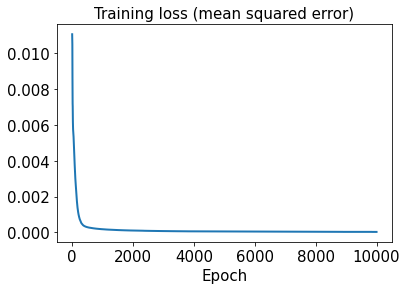

In [46]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

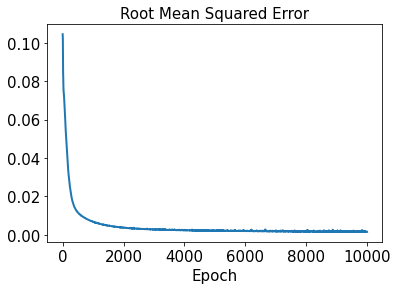

In [47]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [48]:
test_results = sd.evaluate(x_train)

7/7 [==============================] - 0s 2ms/step - loss: 2.9205e-05 - rmse: 0.0000e+00


In [49]:
decoded_train = sd.predict(decoded_sensor_train)

In [50]:
decoded_test = sd.predict(decoded_sensor_test)

In [51]:
error_train_abs = np.abs(decoded_train - y_train)

In [52]:
error_test_abs = np.abs(decoded_test - y_test)

In [53]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.00039991792


In [54]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.004392542


In [55]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

[0.00041721208, 0.0005190717, 0.00031490187, 0.00046149775, 0.00039440335, 0.00043323255, 0.00028134836, 0.00034626038, 0.0008020888, 0.00049367716, 0.00017204069, 0.0008668239, 0.00015566335, 0.0002856401, 0.00019682021, 0.00027913347, 0.00023919204, 0.00033073674, 0.0002970233, 0.00017311297, 0.00038454644, 0.00037078548, 0.00038763895, 0.00021344455, 0.00031425414, 0.0003664879, 0.00053715793, 0.00056027144, 0.0005463417, 0.00019855943, 0.0002825468, 0.00036565977, 0.00031190505, 0.00027231214, 0.00012659606, 0.0005029766, 0.0008939102, 0.0007929508, 0.0004820744, 0.00015728937, 0.00022261283, 0.00039289353, 0.0004655999, 0.00028670128, 0.00022326919, 0.0007148118, 0.0004230725, 0.00052604586, 0.00021881686, 0.00015726865, 0.0002913013, 0.0005668915, 0.001010199, 0.0009168958, 0.00043187258, 0.00073967525, 0.00016553076, 0.0005350972, 0.00013551836, 0.00037893406, 0.0003063033, 0.00031864856, 0.00042021665, 0.0008500643, 0.00037626945, 0.00038382658, 0.00035246892, 0.00097475504, 0.

In [56]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.0020227246, 0.00089090073, 0.003304802, 0.0027101312, 0.0030136432, 0.006282167, 0.006969674, 0.004060585, 0.0044643125, 0.0024464822, 0.0067725745, 0.003979861, 0.004728984, 0.0026848642, 0.0023797997, 0.0027250373, 0.0043086465, 0.0076207733, 0.005380597, 0.0034963614, 0.004138446, 0.003990867, 0.0104505895]


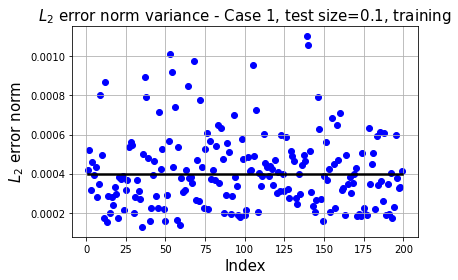

In [63]:
plt.plot(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train*np.ones(x_train.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_train.shape[0], x_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Case 1, test size=0.1, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

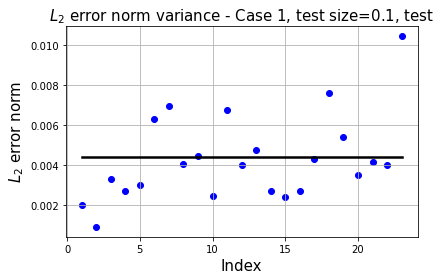

In [64]:
plt.plot(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test*np.ones(x_test.shape[0],), 'k',
        lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], x_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Case 1, test size=0.1, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

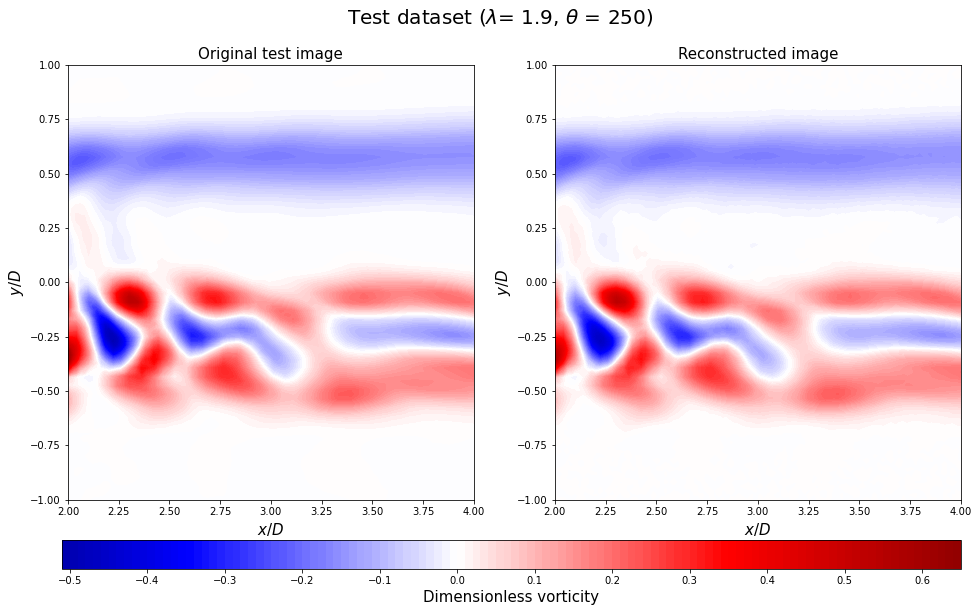

In [59]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

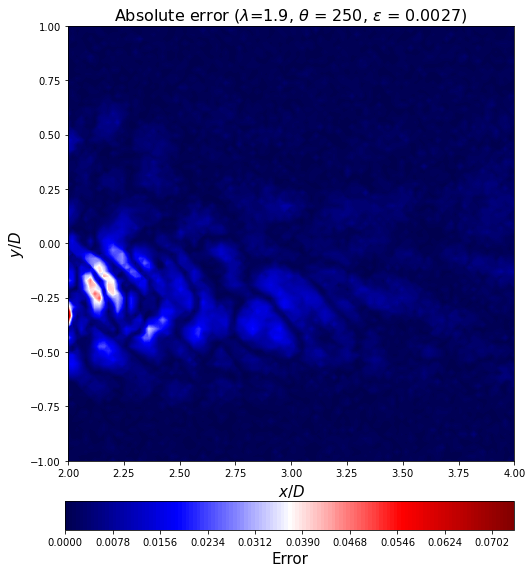

In [60]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()